In [1]:
import pandas as pd
import numpy as npy
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv(r'A:\Data Analytics\(Forage)Quantium\Quantium_data_model.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264834 non-null  object 
 1   STORE_NBR         264834 non-null  int64  
 2   LYLTY_CARD_NBR    264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264833 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264833 non-null  float64
 8   PACK_SIZE         264833 non-null  float64
 9   BRAND             264833 non-null  object 
 10  LIFESTAGE         264833 non-null  object 
 11  PREMIUM_CUSTOMER  264833 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 24.2+ MB


In [4]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264834 non-null  datetime64[ns]
 1   STORE_NBR         264834 non-null  int64         
 2   LYLTY_CARD_NBR    264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         264833 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264833 non-null  float64       
 8   PACK_SIZE         264833 non-null  float64       
 9   BRAND             264833 non-null  object        
 10  LIFESTAGE         264833 non-null  object        
 11  PREMIUM_CUSTOMER  264833 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 24.2+ MB


In [6]:
df['month_ID']= df['DATE'].dt.strftime('%Y%m')

In [7]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,month_ID
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175.0,NCC,YOUNG SINGLES/COUPLES,Premium,201810
1,2018-09-16,1,1002,2,58,Red Rock Deli Chikn & Garlic Aioli,1,2.7,150.0,RRD,YOUNG SINGLES/COUPLES,Mainstream,201809
2,2019-03-07,1,1003,3,52,Grain Waves Sour Cream & Chives,1,3.6,210.0,Grain Waves,YOUNG FAMILIES,Budget,201903
3,2019-03-08,1,1003,4,106,Natural ChipCo Hony Soy Chckn,1,3.0,175.0,NCC,YOUNG FAMILIES,Budget,201903
4,2018-11-02,1,1004,5,96,WW Original Stacked Chips,1,1.9,160.0,Woolworths,OLDER SINGLES/COUPLES,Mainstream,201811


In [8]:
df_agg_tsales = df.groupby(['STORE_NBR','month_ID'])['TOT_SALES'].agg(['sum']).rename(columns= {'sum':'TOT_SALES'})

In [9]:
df_agg_tqty = df.groupby(['STORE_NBR','month_ID'])['PROD_QTY'].agg(['sum']).rename(columns= {'sum':'TOT_QTY'})

In [10]:
df_agg_tcustomers = df.groupby(['STORE_NBR','month_ID'])['LYLTY_CARD_NBR'].nunique().reset_index().rename(columns= {'LYLTY_CARD_NBR':'TOT_Customers'})

In [11]:
df_agg_ttransactions = df.groupby(['STORE_NBR','month_ID'])['TXN_ID'].nunique().reset_index().rename(columns= {'TXN_ID':'TOT_Transactions'})

In [12]:
df_agg = df_agg_tsales.merge(df_agg_tqty, on=['STORE_NBR', 'month_ID'], how='inner')

In [13]:
df_agg = df_agg.merge(df_agg_tcustomers, on=['STORE_NBR', 'month_ID'], how='inner')

In [14]:
df_agg = df_agg.merge(df_agg_ttransactions, on=['STORE_NBR', 'month_ID'], how='inner')

In [15]:
df_agg

,STORE_NBR,month_ID,TOT_SALES,TOT_QTY,TOT_Customers,TOT_Transactions
0,0,201812,0.0,0,1,1
1,1,201807,206.9,62,49,52
2,1,201808,176.1,54,42,43
3,1,201809,278.8,75,59,62
4,1,201810,188.1,58,44,45
...,...,...,...,...,...,...
3165,272,201902,395.5,91,45,48
3166,272,201903,442.3,101,50,53
3167,272,201904,445.1,105,54,55
3168,272,201905,314.6,71,34,40


In [16]:
df_agg['TRN_P_Customer'] = df_agg['TOT_Transactions']/df_agg['TOT_Customers']

In [17]:
df_agg

,STORE_NBR,month_ID,TOT_SALES,TOT_QTY,TOT_Customers,TOT_Transactions,TRN_P_Customer
0,0,201812,0.0,0,1,1,1.000000
1,1,201807,206.9,62,49,52,1.061224
2,1,201808,176.1,54,42,43,1.023810
3,1,201809,278.8,75,59,62,1.050847
4,1,201810,188.1,58,44,45,1.022727
...,...,...,...,...,...,...,...
3165,272,201902,395.5,91,45,48,1.066667
3166,272,201903,442.3,101,50,53,1.060000
3167,272,201904,445.1,105,54,55,1.018519
3168,272,201905,314.6,71,34,40,1.176471


In [18]:
df_agg['Chips_per_customer'] = df_agg['TOT_QTY'] / df_agg['TOT_Customers']

In [19]:
df_agg['avgPrice_per_unit'] = df_agg['TOT_SALES'] / df_agg['TOT_QTY']

In [20]:
df_agg

,STORE_NBR,month_ID,TOT_SALES,TOT_QTY,TOT_Customers,TOT_Transactions,TRN_P_Customer,Chips_per_customer,avgPrice_per_unit
0,0,201812,0.0,0,1,1,1.000000,0.000000,NaN
1,1,201807,206.9,62,49,52,1.061224,1.265306,3.337097
2,1,201808,176.1,54,42,43,1.023810,1.285714,3.261111
3,1,201809,278.8,75,59,62,1.050847,1.271186,3.717333
4,1,201810,188.1,58,44,45,1.022727,1.318182,3.243103
...,...,...,...,...,...,...,...,...,...
3165,272,201902,395.5,91,45,48,1.066667,2.022222,4.346154
3166,272,201903,442.3,101,50,53,1.060000,2.020000,4.379208
3167,272,201904,445.1,105,54,55,1.018519,1.944444,4.239048
3168,272,201905,314.6,71,34,40,1.176471,2.088235,4.430986


In [21]:
#Pre-trial Observaltions for all the stores

df_agg_po = df_agg.query('month_ID < "201903"')
df_agg_po

,STORE_NBR,month_ID,TOT_SALES,TOT_QTY,TOT_Customers,TOT_Transactions,TRN_P_Customer,Chips_per_customer,avgPrice_per_unit
0,0,201812,0.0,0,1,1,1.000000,0.000000,NaN
1,1,201807,206.9,62,49,52,1.061224,1.265306,3.337097
2,1,201808,176.1,54,42,43,1.023810,1.285714,3.261111
3,1,201809,278.8,75,59,62,1.050847,1.271186,3.717333
4,1,201810,188.1,58,44,45,1.022727,1.318182,3.243103
...,...,...,...,...,...,...,...,...,...
3161,272,201810,430.6,99,44,50,1.136364,2.250000,4.349495
3162,272,201811,376.2,87,41,45,1.097561,2.121951,4.324138
3163,272,201812,403.9,89,47,47,1.000000,1.893617,4.538202
3164,272,201901,423.0,96,46,50,1.086957,2.086957,4.406250


In [22]:
df_agg_po.query('month_ID > "201903"')

,STORE_NBR,month_ID,TOT_SALES,TOT_QTY,TOT_Customers,TOT_Transactions,TRN_P_Customer,Chips_per_customer,avgPrice_per_unit


# Data analysis for Trial Store 77

In [23]:
df_agg_po.query('STORE_NBR == 77')

,STORE_NBR,month_ID,TOT_SALES,TOT_QTY,TOT_Customers,TOT_Transactions,TRN_P_Customer,Chips_per_customer,avgPrice_per_unit
881,77,201807,296.8,84,51,55,1.078431,1.647059,3.533333
882,77,201808,255.5,74,47,48,1.021277,1.574468,3.452703
883,77,201809,225.2,70,42,44,1.047619,1.666667,3.217143
884,77,201810,204.5,52,37,38,1.027027,1.405405,3.932692
885,77,201811,245.3,67,41,44,1.073171,1.634146,3.661194
886,77,201812,267.3,72,46,48,1.043478,1.565217,3.712500
887,77,201901,204.4,65,35,39,1.114286,1.857143,3.144615
888,77,201902,235.0,74,45,45,1.000000,1.644444,3.175676


In [24]:
df_agg_po_str1 = df_agg_po.query('STORE_NBR == 77')[['month_ID','TOT_SALES','TOT_Customers']].reset_index(drop=True)

In [25]:
# str1_sales_mean = df_agg_po_str1[['TOT_SALES']].mean()

In [26]:
df_agg_po_str1

,month_ID,TOT_SALES,TOT_Customers
0,201807,296.8,51
1,201808,255.5,47
2,201809,225.2,42
3,201810,204.5,37
4,201811,245.3,41
5,201812,267.3,46
6,201901,204.4,35
7,201902,235.0,45


In [27]:
def tpl(n):
    np =df_agg_po.query('STORE_NBR == @n')[['TOT_SALES']].reset_index(drop=True)
    r = df_agg_po_str1['TOT_SALES'].corr(np['TOT_SALES'])
    return r

sales_list = []
for i in range(1,273):
        coe = tpl(i)  # Call the custom function
        sales_list.append(coe)

c:\Users\KNIGHT GOKU\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\KNIGHT GOKU\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\KNIGHT GOKU\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\KNIGHT GOKU\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\KNIGHT GOKU\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true

In [28]:
#sales_list

In [29]:
sales_list = pd.DataFrame(sales_list).rename(columns={0:'Sales_coe'})
sales_list

,Sales_coe
0,0.050163
1,-0.200796
2,0.616574
3,-0.094125
4,-0.045765
...,...
267,0.350807
268,-0.315842
269,0.324937
270,0.362891


In [30]:
sales_list.query('Sales_coe >= 0.8')

,Sales_coe
16,0.843806
76,1.000000
118,0.831832
232,0.894375


#Customer Data Analysis

In [31]:
def tpl(n):
    np = df_agg_po.query('STORE_NBR == @n')[['TOT_Customers']].reset_index(drop=True)
    r = df_agg_po_str1['TOT_Customers'].corr(np['TOT_Customers'])
    return r

customer_list = []
for i in range(1,273):
        cmr_coe = tpl(i)  # Call the custom function
        customer_list.append(cmr_coe)

c:\Users\KNIGHT GOKU\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\KNIGHT GOKU\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\KNIGHT GOKU\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\KNIGHT GOKU\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\KNIGHT GOKU\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\KNIGHT GOKU\Ap

In [32]:
#customer_list

In [33]:
customer_list = pd.DataFrame(customer_list).rename(columns={0:'Customer_coe'})

In [34]:
customer_list

,Customer_coe
0,0.350572
1,-0.455226
2,0.756913
3,-0.302046
4,0.277619
...,...
267,0.283287
268,-0.492708
269,-0.176932
270,-0.056788


In [35]:
customer_list.query('Customer_coe >= 0.8')

,Customer_coe
40,0.811844
76,1.000000
118,0.977709
232,0.990542


In [36]:
sales_list.query('Sales_coe >= 0.8')

,Sales_coe
16,0.843806
76,1.000000
118,0.831832
232,0.894375


#Index 232 (Store 233) has strogest positive relation with Store 77's total sales and total customer data thus we will select #Store233 as the control store for trial store 77

In [37]:
df_po_st1 = df_agg_po.query('STORE_NBR == 77')[['month_ID','TOT_Customers', 'TOT_SALES']]

In [38]:
df_agg_po.query('STORE_NBR == 233')[['month_ID','TOT_Customers', 'TOT_SALES']]

,month_ID,TOT_Customers,TOT_SALES
2700,201807,51,290.7
2701,201808,48,285.9
2702,201809,42,228.6
2703,201810,35,185.7
2704,201811,40,211.6
2705,201812,47,279.8
2706,201901,35,177.5
2707,201902,45,244.0


In [39]:
df_po_st1_c = df_agg_po.query('STORE_NBR == 233')[['month_ID','TOT_Customers', 'TOT_SALES']]

#We are selecting Store 233 to be the control store for trial store 77

Text(0.5, 1.0, 'Total_Customers Per Month')

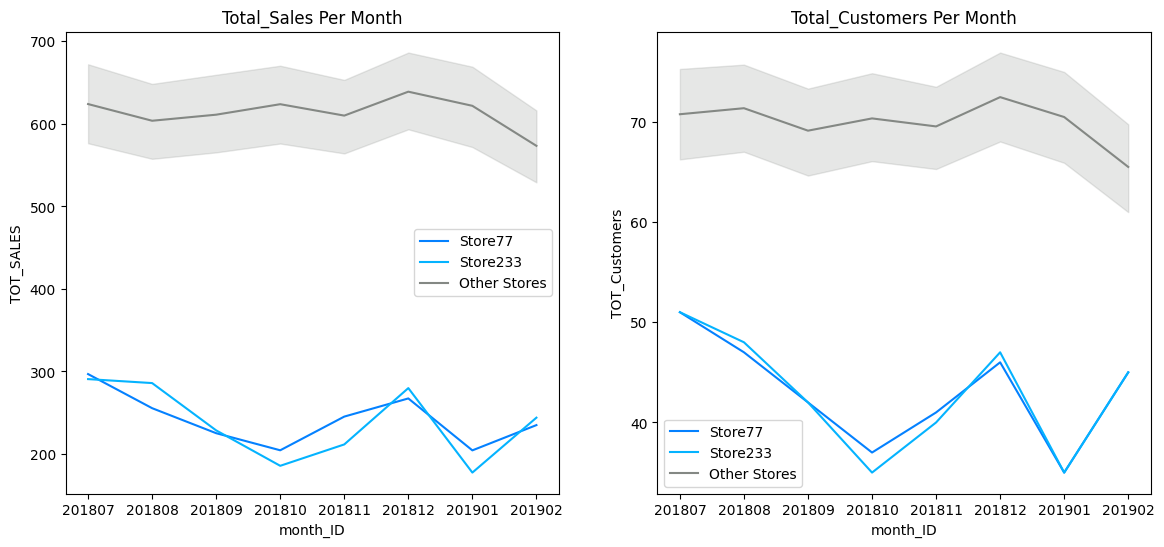

In [185]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.lineplot(data=df_po_st1, x='month_ID', y='TOT_SALES', label='Store77', color='#0481FF')
sns.lineplot(data=df_po_st1_c, x='month_ID', y='TOT_SALES', label='Store233', color='#04B3FF')
sns.lineplot(data=df_agg_po.query('STORE_NBR != [77,233]'), x='month_ID', y='TOT_SALES', label='Other Stores', color='#848884')
plt.title('Total_Sales Per Month')
plt.subplot(1,2,2)
sns.lineplot(data=df_po_st1, x='month_ID', y='TOT_Customers', label='Store77', color='#0481FF')
sns.lineplot(data=df_po_st1_c, x='month_ID', y='TOT_Customers', label='Store233',color='#04B3FF')
sns.lineplot(data=df_agg_po.query('STORE_NBR != [77,233]'), x='month_ID', y='TOT_Customers', label='Other Stores', color='#848884')
plt.title('Total_Customers Per Month')

Text(0.5, 1.0, 'Total_Customers Per Month')

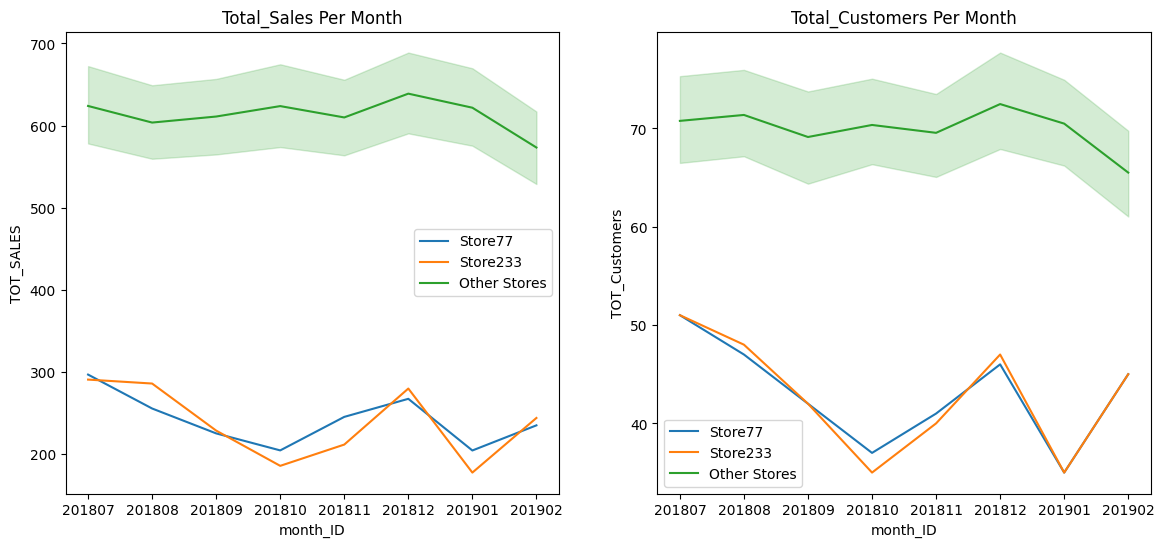

In [186]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.lineplot(data=df_po_st1, x='month_ID', y='TOT_SALES', label='Store77')
sns.lineplot(data=df_po_st1_c, x='month_ID', y='TOT_SALES', label='Store233')
sns.lineplot(data=df_agg_po.query('STORE_NBR != [77,233]'), x='month_ID', y='TOT_SALES', label='Other Stores')
plt.title('Total_Sales Per Month')
plt.subplot(1,2,2)
sns.lineplot(data=df_po_st1, x='month_ID', y='TOT_Customers', label='Store77')
sns.lineplot(data=df_po_st1_c, x='month_ID', y='TOT_Customers', label='Store233')
sns.lineplot(data=df_agg_po.query('STORE_NBR != [77,233]'), x='month_ID', y='TOT_Customers', label='Other Stores')
plt.title('Total_Customers Per Month')

# Store77 Statistical analysis

In [41]:
str1c_factor = df_po_st1['TOT_SALES'].sum()/df_po_st1_c['TOT_SALES'].sum()

In [42]:
str1_sales = df_agg.query('STORE_NBR == 77')[['month_ID','TOT_SALES']]

In [43]:
str1_c_sales = df_agg.query('STORE_NBR == 233')[['month_ID','TOT_SALES']]

In [44]:
str1_c_sales['TOT_SALES'] * str1c_factor

2700    295.311377
2701    290.435235
2702    232.226284
2703    188.645761
2704    214.956613
2705    284.238470
2706    180.315684
2707    247.870575
2708    202.258325
2709    161.115874
2710    349.863221
2711    224.505725
Name: TOT_SALES, dtype: float64

In [45]:
str1_c_ScaledSales = str1_c_sales['TOT_SALES'] * str1c_factor

In [46]:
str1_c_ScaledSales

2700    295.311377
2701    290.435235
2702    232.226284
2703    188.645761
2704    214.956613
2705    284.238470
2706    180.315684
2707    247.870575
2708    202.258325
2709    161.115874
2710    349.863221
2711    224.505725
Name: TOT_SALES, dtype: float64

In [47]:
str1_c_sales['Scaled_Sales'] = str1_c_ScaledSales

In [48]:
str1_c_sales

,month_ID,TOT_SALES,Scaled_Sales
2700,201807,290.7,295.311377
2701,201808,285.9,290.435235
2702,201809,228.6,232.226284
2703,201810,185.7,188.645761
2704,201811,211.6,214.956613
2705,201812,279.8,284.238470
2706,201901,177.5,180.315684
2707,201902,244.0,247.870575
2708,201903,199.1,202.258325
2709,201904,158.6,161.115874


In [49]:
str1_sales.query('month_ID > "201902"')

,month_ID,TOT_SALES
889,201903,278.5
890,201904,263.5
891,201905,299.3
892,201906,264.7


In [50]:
str1_sales

,month_ID,TOT_SALES
881,201807,296.8
882,201808,255.5
883,201809,225.2
884,201810,204.5
885,201811,245.3
886,201812,267.3
887,201901,204.4
888,201902,235.0
889,201903,278.5
890,201904,263.5


In [51]:
str1_c_sales

,month_ID,TOT_SALES,Scaled_Sales
2700,201807,290.7,295.311377
2701,201808,285.9,290.435235
2702,201809,228.6,232.226284
2703,201810,185.7,188.645761
2704,201811,211.6,214.956613
2705,201812,279.8,284.238470
2706,201901,177.5,180.315684
2707,201902,244.0,247.870575
2708,201903,199.1,202.258325
2709,201904,158.6,161.115874


In [52]:
str1_sales = str1_sales.merge(str1_c_sales[['month_ID','Scaled_Sales']], on='month_ID', how='inner')

In [53]:
((str1_sales['TOT_SALES'] - str1_sales['Scaled_Sales'] ) / str1_sales['Scaled_Sales']) * 100

0      0.504086
1    -12.028580
2     -3.025620
3      8.404238
4     14.116052
5     -5.959246
6     13.356750
7     -5.192458
8     37.695197
9     63.546890
10   -14.452282
11    17.903452
dtype: float64

In [54]:
str1_sales['%_diff'] = abs(((str1_sales['TOT_SALES'] - str1_sales['Scaled_Sales'] ) / str1_sales['Scaled_Sales']) * 100)

In [55]:
str1_sales

,month_ID,TOT_SALES,Scaled_Sales,%_diff
0,201807,296.8,295.311377,0.504086
1,201808,255.5,290.435235,12.028580
2,201809,225.2,232.226284,3.025620
3,201810,204.5,188.645761,8.404238
4,201811,245.3,214.956613,14.116052
5,201812,267.3,284.238470,5.959246
6,201901,204.4,180.315684,13.356750
7,201902,235.0,247.870575,5.192458
8,201903,278.5,202.258325,37.695197
9,201904,263.5,161.115874,63.546890


In [56]:
sd = str1_sales.query('month_ID < "201903"')['%_diff'].std()
sd

np.float64(5.003203638285844)

In [57]:
str1_sales.query('month_ID < "201903"')

,month_ID,TOT_SALES,Scaled_Sales,%_diff
0,201807,296.8,295.311377,0.504086
1,201808,255.5,290.435235,12.028580
2,201809,225.2,232.226284,3.025620
3,201810,204.5,188.645761,8.404238
4,201811,245.3,214.956613,14.116052
5,201812,267.3,284.238470,5.959246
6,201901,204.4,180.315684,13.356750
7,201902,235.0,247.870575,5.192458


In [58]:
str1_sales['t_values'] =  (str1_sales['%_diff'] - 0) / sd
str1_sales

,month_ID,TOT_SALES,Scaled_Sales,%_diff,t_values
0,201807,296.8,295.311377,0.504086,0.100753
1,201808,255.5,290.435235,12.028580,2.404176
2,201809,225.2,232.226284,3.025620,0.604736
3,201810,204.5,188.645761,8.404238,1.679771
4,201811,245.3,214.956613,14.116052,2.821403
5,201812,267.3,284.238470,5.959246,1.191086
6,201901,204.4,180.315684,13.356750,2.669640
7,201902,235.0,247.870575,5.192458,1.037827
8,201903,278.5,202.258325,37.695197,7.534212
9,201904,263.5,161.115874,63.546890,12.701240


In [59]:
str1_sales.query(' month_ID > "201902"')

,month_ID,TOT_SALES,Scaled_Sales,%_diff,t_values
8,201903,278.5,202.258325,37.695197,7.534212
9,201904,263.5,161.115874,63.546890,12.701240
10,201905,299.3,349.863221,14.452282,2.888606
11,201906,264.7,224.505725,17.903452,3.578398


95 percentile t-value of degree of freedom 7 is 1.894579 

t-value of the samples during the trial period is higher.

In [60]:
str1_comp_df = str1_sales.merge(str1_c_sales[['month_ID','TOT_SALES']], on='month_ID', how='inner').rename(columns={'TOT_SALES_x':'TOT_SALES', 'TOT_SALES_y':'TOT_SALES_C'})

In [61]:
str1_comp_df.drop(columns=['Scaled_Sales','%_diff'], inplace=True)

In [62]:
str1_comp_df

,month_ID,TOT_SALES,t_values,TOT_SALES_C
0,201807,296.8,0.100753,290.7
1,201808,255.5,2.404176,285.9
2,201809,225.2,0.604736,228.6
3,201810,204.5,1.679771,185.7
4,201811,245.3,2.821403,211.6
5,201812,267.3,1.191086,279.8
6,201901,204.4,2.669640,177.5
7,201902,235.0,1.037827,244.0
8,201903,278.5,7.534212,199.1
9,201904,263.5,12.701240,158.6


In [63]:
str1_comp_df['p_95'] = str1_comp_df['TOT_SALES_C'] + pow(sd,2)
str1_comp_df['p_5'] = str1_comp_df['TOT_SALES_C'] - pow(sd,2)
str1_comp_df

,month_ID,TOT_SALES,t_values,TOT_SALES_C,p_95,p_5
0,201807,296.8,0.100753,290.7,315.732047,265.667953
1,201808,255.5,2.404176,285.9,310.932047,260.867953
2,201809,225.2,0.604736,228.6,253.632047,203.567953
3,201810,204.5,1.679771,185.7,210.732047,160.667953
4,201811,245.3,2.821403,211.6,236.632047,186.567953
5,201812,267.3,1.191086,279.8,304.832047,254.767953
6,201901,204.4,2.669640,177.5,202.532047,152.467953
7,201902,235.0,1.037827,244.0,269.032047,218.967953
8,201903,278.5,7.534212,199.1,224.132047,174.067953
9,201904,263.5,12.701240,158.6,183.632047,133.567953


Text(0.5, 1.0, 'Total_Sales comparision Chart')

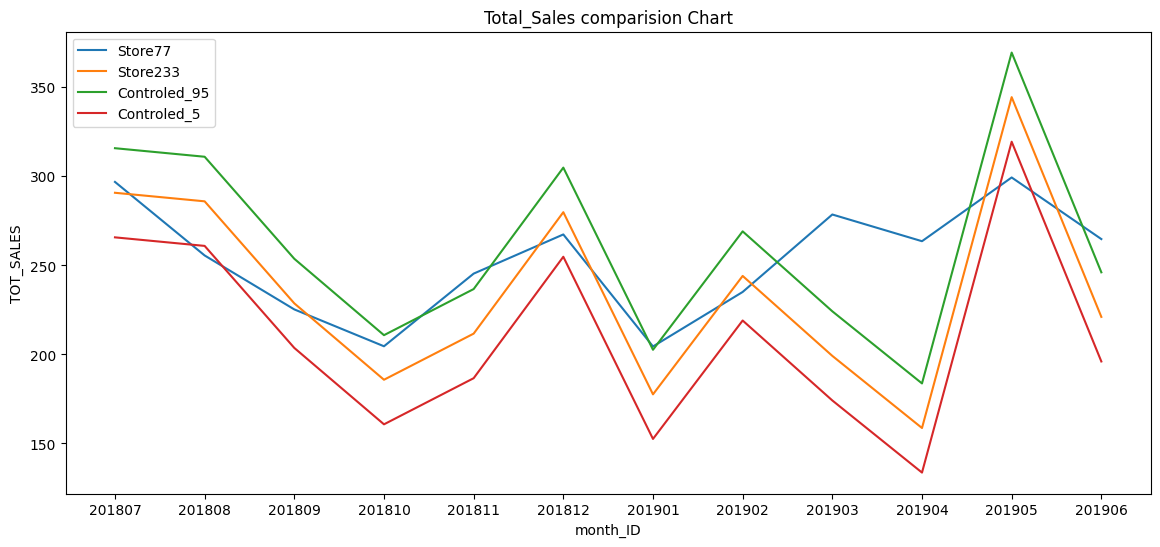

In [64]:
plt.figure(figsize=(14,6))
sns.lineplot(data=str1_comp_df, x='month_ID', y='TOT_SALES', label='Store77')
sns.lineplot(data=str1_comp_df, x='month_ID', y='TOT_SALES_C', label='Store233')
sns.lineplot(data=str1_comp_df, x='month_ID', y='p_95', label='Controled_95')
sns.lineplot(data=str1_comp_df, x='month_ID', y='p_5', label='Controled_5')
plt.title('Total_Sales comparision Chart')

Text(0.5, 1.0, 'Total_Sales comparision Chart')

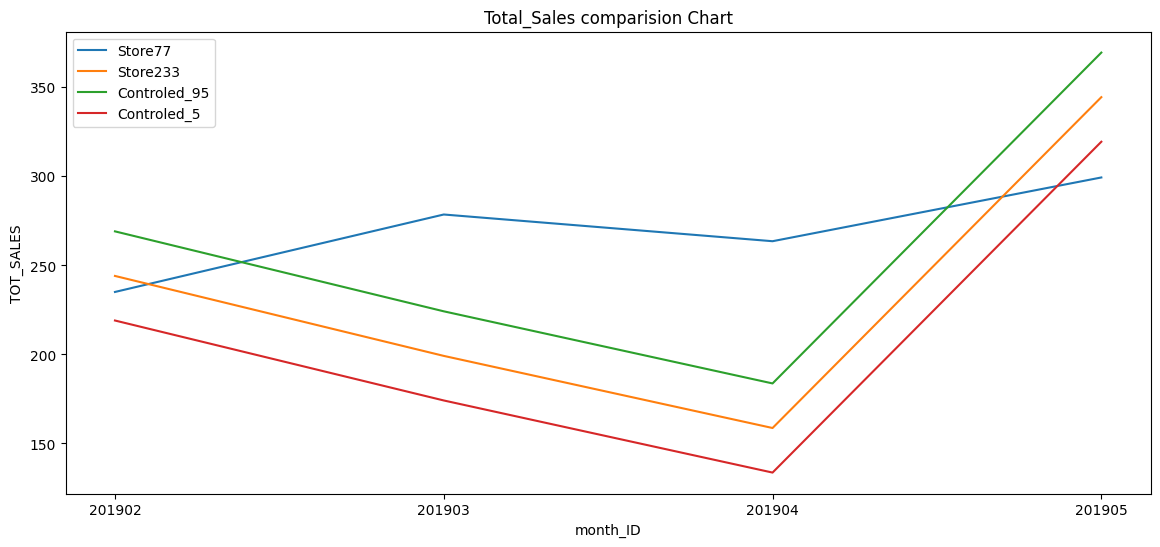

In [188]:
plt.figure(figsize=(14,6))
sns.lineplot(data=str1_comp_df.query('"201901"< month_ID < "201906"'), x='month_ID', y='TOT_SALES', label='Store77')
sns.lineplot(data=str1_comp_df.query('"201901"< month_ID < "201906"'), x='month_ID', y='TOT_SALES_C', label='Store233')
sns.lineplot(data=str1_comp_df.query('"201901"< month_ID < "201906"'), x='month_ID', y='p_95', label='Controled_95')
sns.lineplot(data=str1_comp_df.query('"201901"< month_ID < "201906"'), x='month_ID', y='p_5', label='Controled_5')
plt.title('Total_Sales comparision Chart')

In [65]:
str1_c_95 = str1_comp_df.query('"201901"< month_ID < "201905"')['TOT_SALES_C'].quantile(0.95)

In [66]:
str1_c_5 = str1_comp_df.query('"201901"< month_ID < "201905"')['TOT_SALES_C'].quantile(0.05)

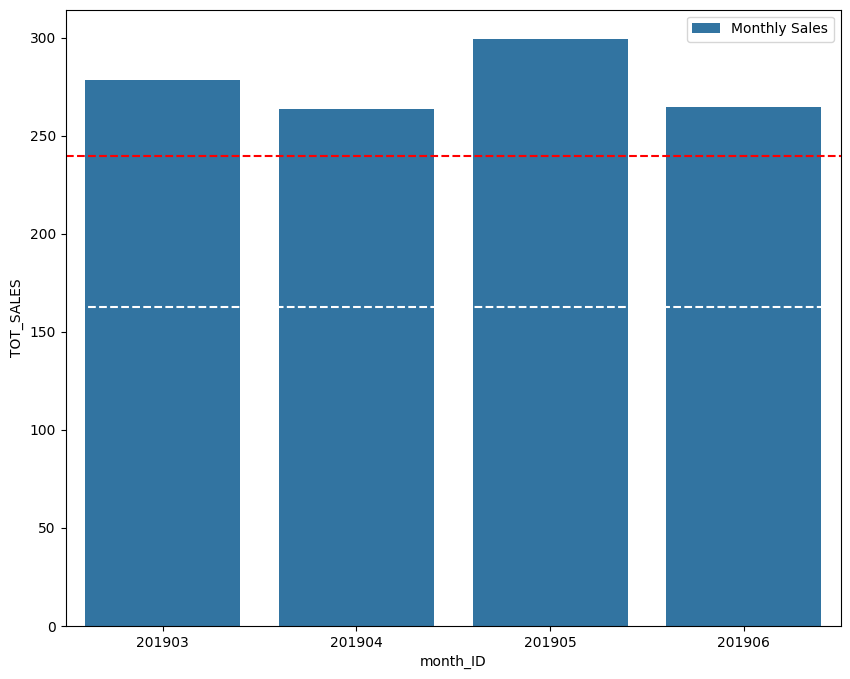

In [67]:
plt.figure(figsize=(10, 8))
sns.barplot(data=str1_comp_df.query('month_ID >"201902"'), x='month_ID', y='TOT_SALES', label='Monthly Sales')

plt.axhline(y=str1_c_95, color='red', linestyle='--', label='95th Percentile')
plt.axhline(y=str1_c_5, color='white', linestyle='--', label='95th Percentile')

# customer data analysis for store 77

In [68]:
str1c_cmr_factor = df_po_st1['TOT_Customers'].sum()/df_po_st1_c['TOT_Customers'].sum()
str1c_cmr_factor

np.float64(1.0029154518950438)

In [69]:
str1_customer = df_agg.query('STORE_NBR == 77')[['month_ID','TOT_Customers']]
str1_customer

,month_ID,TOT_Customers
881,201807,51
882,201808,47
883,201809,42
884,201810,37
885,201811,41
886,201812,46
887,201901,35
888,201902,45
889,201903,50
890,201904,47


In [70]:
str1_c_customer = df_agg.query('STORE_NBR == 233')[['month_ID','TOT_Customers']]
str1_c_customer

,month_ID,TOT_Customers
2700,201807,51
2701,201808,48
2702,201809,42
2703,201810,35
2704,201811,40
2705,201812,47
2706,201901,35
2707,201902,45
2708,201903,40
2709,201904,30


In [71]:
str1_customer = str1_customer.merge(str1_c_customer, on='month_ID', how='inner').rename(columns={'TOT_Customers_x':'T_Customers','TOT_Customers_y':'T_Customers_C'})
str1_customer

,month_ID,T_Customers,T_Customers_C
0,201807,51,51
1,201808,47,48
2,201809,42,42
3,201810,37,35
4,201811,41,40
5,201812,46,47
6,201901,35,35
7,201902,45,45
8,201903,50,40
9,201904,47,30


In [72]:
str1_customer['Scaled_Customers'] = str1_customer['T_Customers_C'] * str1c_factor
str1_customer

,month_ID,T_Customers,T_Customers_C,Scaled_Customers
0,201807,51,51,51.809014
1,201808,47,48,48.761425
2,201809,42,42,42.666246
3,201810,37,35,35.555205
4,201811,41,40,40.634520
5,201812,46,47,47.745562
6,201901,35,35,35.555205
7,201902,45,45,45.713835
8,201903,50,40,40.634520
9,201904,47,30,30.475890


In [73]:
str1_customer['%_diff'] = abs(((str1_customer['T_Customers'] - str1_customer['Scaled_Customers']) / str1_customer['Scaled_Customers'])*100)
str1_customer

,month_ID,T_Customers,T_Customers_C,Scaled_Customers,%_diff
0,201807,51,51,51.809014,1.561531
1,201808,47,48,48.761425,3.612332
2,201809,42,42,42.666246,1.561531
3,201810,37,35,35.555205,4.063525
4,201811,41,40,40.634520,0.899431
5,201812,46,47,47.745562,3.655966
6,201901,35,35,35.555205,1.561531
7,201902,45,45,45.713835,1.561531
8,201903,50,40,40.634520,23.048087
9,201904,47,30,30.475890,54.220269


In [74]:
str1_customer.query('month_ID < "201903"')

,month_ID,T_Customers,T_Customers_C,Scaled_Customers,%_diff
0,201807,51,51,51.809014,1.561531
1,201808,47,48,48.761425,3.612332
2,201809,42,42,42.666246,1.561531
3,201810,37,35,35.555205,4.063525
4,201811,41,40,40.634520,0.899431
5,201812,46,47,47.745562,3.655966
6,201901,35,35,35.555205,1.561531
7,201902,45,45,45.713835,1.561531


In [75]:
sd = str1_customer.query('month_ID < "201903"')['%_diff'].std()
sd

np.float64(1.242869510442506)

In [76]:
str1_customer['t_values'] =  (str1_customer['%_diff'] - 0) / sd
str1_customer

,month_ID,T_Customers,T_Customers_C,Scaled_Customers,%_diff,t_values
0,201807,51,51,51.809014,1.561531,1.256391
1,201808,47,48,48.761425,3.612332,2.906445
2,201809,42,42,42.666246,1.561531,1.256391
3,201810,37,35,35.555205,4.063525,3.269470
4,201811,41,40,40.634520,0.899431,0.723673
5,201812,46,47,47.745562,3.655966,2.941553
6,201901,35,35,35.555205,1.561531,1.256391
7,201902,45,45,45.713835,1.561531,1.256391
8,201903,50,40,40.634520,23.048087,18.544253
9,201904,47,30,30.475890,54.220269,43.625070


In [77]:
str1_customer.query(' month_ID > "201902"')

,month_ID,T_Customers,T_Customers_C,Scaled_Customers,%_diff,t_values
8,201903,50,40,40.634520,23.048087,18.544253
9,201904,47,30,30.475890,54.220269,43.625070
10,201905,55,57,57.904192,5.015512,4.035429
11,201906,41,41,41.650383,1.561531,1.256391


95 percentile t-value of degree of freedom 7 is 1.894579 

t-value of the samples during the trial period is higher in March, April & May months.

In [78]:
str1_customer['p_95'] = str1_customer['T_Customers_C'] + pow(sd,2)
str1_customer['p_5'] = str1_customer['T_Customers_C'] - pow(sd,2)
str1_customer

,month_ID,T_Customers,T_Customers_C,Scaled_Customers,%_diff,t_values,p_95,p_5
0,201807,51,51,51.809014,1.561531,1.256391,52.544725,49.455275
1,201808,47,48,48.761425,3.612332,2.906445,49.544725,46.455275
2,201809,42,42,42.666246,1.561531,1.256391,43.544725,40.455275
3,201810,37,35,35.555205,4.063525,3.269470,36.544725,33.455275
4,201811,41,40,40.634520,0.899431,0.723673,41.544725,38.455275
5,201812,46,47,47.745562,3.655966,2.941553,48.544725,45.455275
6,201901,35,35,35.555205,1.561531,1.256391,36.544725,33.455275
7,201902,45,45,45.713835,1.561531,1.256391,46.544725,43.455275
8,201903,50,40,40.634520,23.048087,18.544253,41.544725,38.455275
9,201904,47,30,30.475890,54.220269,43.625070,31.544725,28.455275


Text(0.5, 1.0, 'Total_Customer comparision Chart')

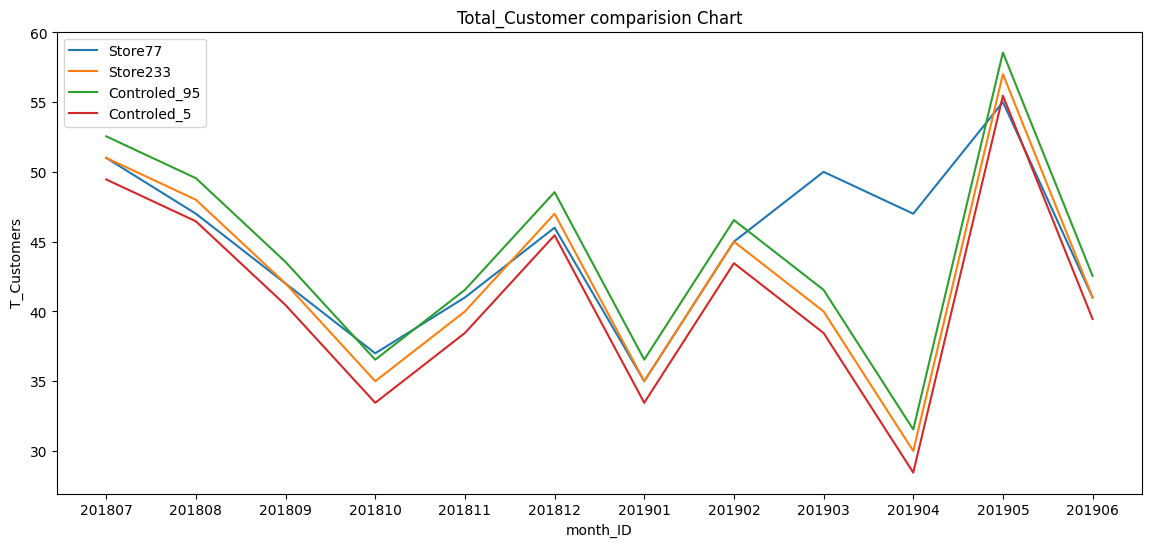

In [79]:
plt.figure(figsize=(14,6))
sns.lineplot(data=str1_customer, x='month_ID', y='T_Customers', label='Store77')
sns.lineplot(data=str1_customer, x='month_ID', y='T_Customers_C', label='Store233')
sns.lineplot(data=str1_customer, x='month_ID', y='p_95', label='Controled_95')
sns.lineplot(data=str1_customer, x='month_ID', y='p_5', label='Controled_5')
plt.title('Total_Customer comparision Chart')

Text(0.5, 1.0, 'Total_Customer comparision Chart')

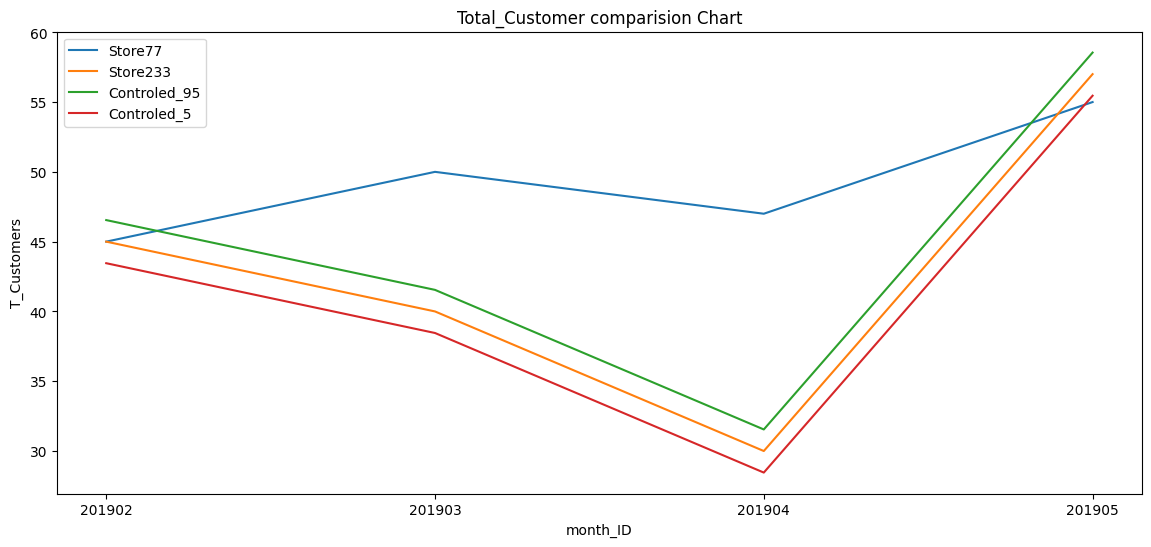

In [187]:
plt.figure(figsize=(14,6))
sns.lineplot(data=str1_customer.query('"201901"< month_ID < "201906"'), x='month_ID', y='T_Customers', label='Store77')
sns.lineplot(data=str1_customer.query('"201901"< month_ID < "201906"'), x='month_ID', y='T_Customers_C', label='Store233')
sns.lineplot(data=str1_customer.query('"201901"< month_ID < "201906"'), x='month_ID', y='p_95', label='Controled_95')
sns.lineplot(data=str1_customer.query('"201901"< month_ID < "201906"'), x='month_ID', y='p_5', label='Controled_5')
plt.title('Total_Customer comparision Chart')

In [80]:
str1_c_c95 = str1_customer.query('"201901"< month_ID < "201905"')['T_Customers_C'].quantile(0.95)

In [81]:
str1_c_c5 = str1_customer.query('"201901"< month_ID < "201905"')['T_Customers_C'].quantile(0.05)

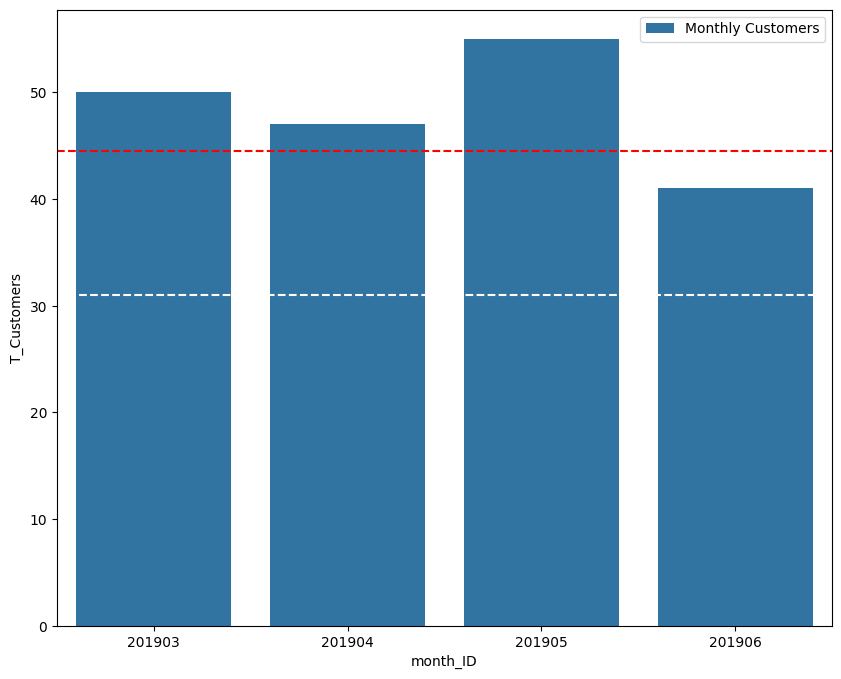

In [82]:
plt.figure(figsize=(10, 8))
sns.barplot(data=str1_customer.query('month_ID >"201902"'), x='month_ID', y='T_Customers', label='Monthly Customers')

plt.axhline(y=str1_c_c95, color='red', linestyle='--', label='95th Percentile')
plt.axhline(y=str1_c_c5, color='white', linestyle='--', label='5th Percentile')

#During the trial period we can see significant increase number of customers in 3/4 months and for the total sales 4/4 months of the trial store compare to the control store.

The trial was a successfull one for Store 77

# Data Analysis for Trial Store 86

In [83]:
df_agg_po.query('STORE_NBR == [86]')

,STORE_NBR,month_ID,TOT_SALES,TOT_QTY,TOT_Customers,TOT_Transactions,TRN_P_Customer,Chips_per_customer,avgPrice_per_unit
978,86,201807,892.20,251,99,126,1.272727,2.535354,3.554582
979,86,201808,764.05,215,94,110,1.170213,2.287234,3.553721
980,86,201809,914.60,258,103,128,1.242718,2.504854,3.544961
981,86,201810,948.40,276,109,138,1.266055,2.532110,3.436232
982,86,201811,918.00,254,100,125,1.250000,2.540000,3.614173
983,86,201812,841.20,240,98,120,1.224490,2.448980,3.505000
984,86,201901,841.40,260,94,129,1.372340,2.765957,3.236154
985,86,201902,913.20,277,107,138,1.289720,2.588785,3.296751


In [84]:
df_agg_po_str2 = df_agg_po.query('STORE_NBR == [86]')[['TOT_Customers', 'TOT_SALES']].reset_index(drop=True)

In [85]:
#str2_sales_mean = df_agg_po_str2[['TOT_SALES']].mean()
#str2_sales_mean

In [86]:
def tpl(n):
    np =df_agg_po.query('STORE_NBR == @n')[['TOT_SALES']].reset_index(drop=True)
    r = df_agg_po_str2['TOT_SALES'].corr(np['TOT_SALES'])
    return r

sales_list = []
for i in range(1,273):
        coe = tpl(i)  # Call the custom function
        sales_list.append(coe)

c:\Users\KNIGHT GOKU\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\KNIGHT GOKU\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\KNIGHT GOKU\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\KNIGHT GOKU\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\KNIGHT GOKU\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true

In [87]:
sales_list = pd.DataFrame(sales_list).rename(columns={0:'Sales_coe'})
sales_list

,Sales_coe
0,0.478355
1,-0.453556
2,-0.081104
3,-0.204603
4,0.067263
...,...
267,-0.494257
268,0.681775
269,-0.747037
270,0.409585


In [88]:
sales_list.query('Sales_coe >= 0.8')

,Sales_coe
85,1.000000
154,0.841589


In [89]:
def tpl(n):
    np = df_agg_po.query('STORE_NBR == @n')[['TOT_Customers']].reset_index(drop=True)
    r = df_agg_po_str2['TOT_Customers'].corr(np['TOT_Customers'])
    return r

customer_list = []
for i in range(1,273):
        cmr_coe = tpl(i)  # Call the custom function
        customer_list.append(cmr_coe)

c:\Users\KNIGHT GOKU\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\KNIGHT GOKU\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\KNIGHT GOKU\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\KNIGHT GOKU\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\KNIGHT GOKU\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\KNIGHT GOKU\Ap

In [90]:
customer_list = pd.DataFrame(customer_list).rename(columns={0:'Customer_coe'})

In [91]:
customer_list.query('Customer_coe >= 0.5')

,Customer_coe
0,0.559062
56,0.581417
73,0.701439
85,1.000000
98,0.640103
146,0.728606
154,0.646118
167,0.540929
175,0.710471
228,0.575004


#Index 154 (Store 155) is the only common indexes and has strogest positive relation with Store 86's total sales and total customer data is moderately similar thus we will select #Store155 as the control store for trial store 86

In [92]:
df_agg_po.query('STORE_NBR == 86')[['month_ID','TOT_Customers', 'TOT_SALES']]

,month_ID,TOT_Customers,TOT_SALES
978,201807,99,892.20
979,201808,94,764.05
980,201809,103,914.60
981,201810,109,948.40
982,201811,100,918.00
983,201812,98,841.20
984,201901,94,841.40
985,201902,107,913.20


In [93]:
df_po_st2 = df_agg_po.query('STORE_NBR == 86')[['month_ID','TOT_Customers', 'TOT_SALES']]

In [94]:
df_agg_po.query('STORE_NBR == 155')[['month_ID','TOT_Customers', 'TOT_SALES']]

,month_ID,TOT_Customers,TOT_SALES
1794,201807,101,924.6
1795,201808,91,782.7
1796,201809,103,1014.4
1797,201810,108,963.8
1798,201811,101,898.8
1799,201812,97,849.8
1800,201901,96,874.6
1801,201902,95,891.2


In [95]:
df_po_st2_c = df_agg_po.query('STORE_NBR == 155')[['month_ID','TOT_Customers', 'TOT_SALES']]

#We are selecting Store 155 to be the control store for the trial store 86

Text(0.5, 1.0, 'Total_Customers Chart')

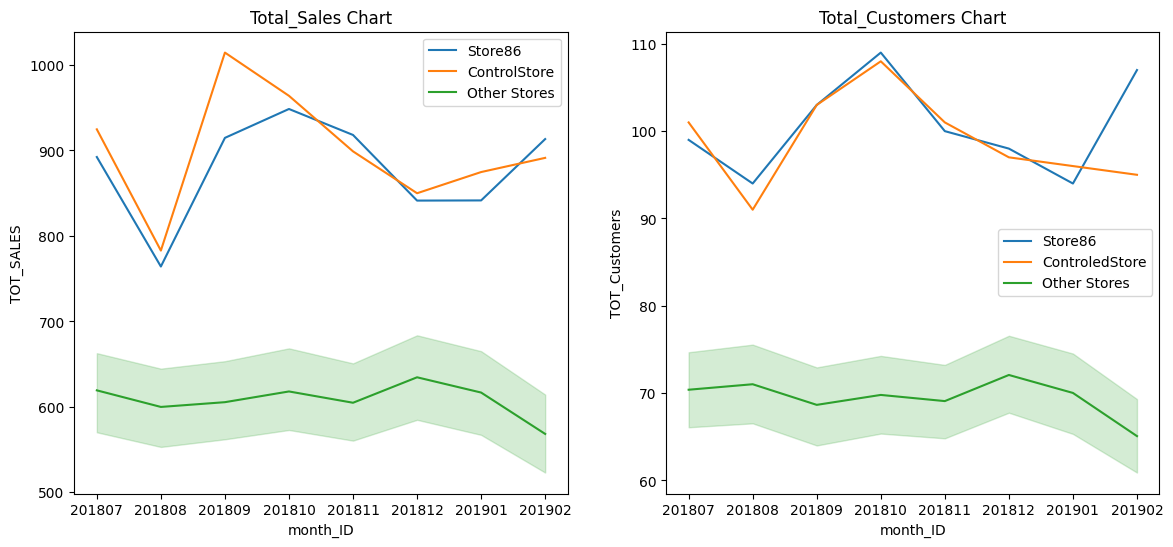

In [96]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.lineplot(data=df_po_st2, x='month_ID', y='TOT_SALES', label='Store86')
sns.lineplot(data=df_po_st2_c, x='month_ID', y='TOT_SALES', label='ControlStore')
sns.lineplot(data=df_agg_po.query('STORE_NBR != [86,155]'), x='month_ID', y='TOT_SALES', label='Other Stores')
plt.title('Total_Sales Chart')
plt.subplot(1,2,2)
sns.lineplot(data=df_po_st2, x='month_ID', y='TOT_Customers', label='Store86')
sns.lineplot(data=df_po_st2_c, x='month_ID', y='TOT_Customers', label='ControledStore')
sns.lineplot(data=df_agg_po.query('STORE_NBR != [86,155]'), x='month_ID', y='TOT_Customers', label='Other Stores')
plt.title('Total_Customers Chart')

# Store86 Statistical analysis

In [190]:
str2c_factor = df_po_st2['TOT_SALES'].sum()/df_po_st2_c['TOT_SALES'].sum()
str2c_factor

np.float64(0.9768260670287088)

In [191]:
str2_sales = df_agg.query('STORE_NBR == 86')[['month_ID','TOT_SALES']]
str2_sales

,month_ID,TOT_SALES
978,201807,892.20
979,201808,764.05
980,201809,914.60
981,201810,948.40
982,201811,918.00
983,201812,841.20
984,201901,841.40
985,201902,913.20
986,201903,1026.80
987,201904,848.20


In [192]:
str2_c_sales = df_agg.query('STORE_NBR == 155')[['month_ID','TOT_SALES']]
str2_c_sales

,month_ID,TOT_SALES
1794,201807,924.60
1795,201808,782.70
1796,201809,1014.40
1797,201810,963.80
1798,201811,898.80
1799,201812,849.80
1800,201901,874.60
1801,201902,891.20
1802,201903,804.40
1803,201904,844.60


In [193]:
str2_c_ScaledSales = str2_c_sales['TOT_SALES'] * str2c_factor
str2_c_ScaledSales

1794    903.173382
1795    764.561763
1796    990.892362
1797    941.464963
1798    877.971269
1799    830.106792
1800    854.332078
1801    870.547391
1802    785.758888
1803    825.027296
1804    901.463936
1805    837.335305
Name: TOT_SALES, dtype: float64

In [194]:
str2_c_sales['Scaled_Sales'] = str2_c_ScaledSales

In [195]:
str2_sales = str2_sales.merge(str2_c_sales[['month_ID','Scaled_Sales']], on='month_ID', how='inner')
str2_sales

,month_ID,TOT_SALES,Scaled_Sales
0,201807,892.20,903.173382
1,201808,764.05,764.561763
2,201809,914.60,990.892362
3,201810,948.40,941.464963
4,201811,918.00,877.971269
5,201812,841.20,830.106792
6,201901,841.40,854.332078
7,201902,913.20,870.547391
8,201903,1026.80,785.758888
9,201904,848.20,825.027296


In [196]:
str2_sales['%_diff'] = abs(((str2_sales['TOT_SALES'] - str2_sales['Scaled_Sales'] ) / str2_sales['Scaled_Sales']) * 100)
str2_sales

,month_ID,TOT_SALES,Scaled_Sales,%_diff
0,201807,892.20,903.173382,1.214981
1,201808,764.05,764.561763,0.066935
2,201809,914.60,990.892362,7.699359
3,201810,948.40,941.464963,0.736622
4,201811,918.00,877.971269,4.559230
5,201812,841.20,830.106792,1.336359
6,201901,841.40,854.332078,1.513706
7,201902,913.20,870.547391,4.899516
8,201903,1026.80,785.758888,30.676218
9,201904,848.20,825.027296,2.808720


In [197]:
sd = str2_sales.query('month_ID < "201902"')['%_diff'].std()
sd

np.float64(2.716042645389702)

In [198]:
str2_sales['t_values'] =  (str2_sales['%_diff'] - 0) / sd
str2_sales

,month_ID,TOT_SALES,Scaled_Sales,%_diff,t_values
0,201807,892.20,903.173382,1.214981,0.447335
1,201808,764.05,764.561763,0.066935,0.024644
2,201809,914.60,990.892362,7.699359,2.834771
3,201810,948.40,941.464963,0.736622,0.271211
4,201811,918.00,877.971269,4.559230,1.678630
5,201812,841.20,830.106792,1.336359,0.492024
6,201901,841.40,854.332078,1.513706,0.557321
7,201902,913.20,870.547391,4.899516,1.803917
8,201903,1026.80,785.758888,30.676218,11.294454
9,201904,848.20,825.027296,2.808720,1.034122


In [199]:
str2_sales.query(' month_ID > "201902"')

,month_ID,TOT_SALES,Scaled_Sales,%_diff,t_values
8,201903,1026.8,785.758888,30.676218,11.294454
9,201904,848.2,825.027296,2.808720,1.034122
10,201905,889.3,901.463936,1.349354,0.496809
11,201906,838.0,837.335305,0.079382,0.029227


In [200]:
str2_comp_df = str2_sales.merge(str2_c_sales[['month_ID','TOT_SALES']], on=['month_ID'], how='inner')\
.rename(columns={'TOT_SALES_x':'TOT_SALES', 'TOT_SALES_y':'TOT_SALES_C'})

In [201]:
str2_comp_df['p_95'] = str2_comp_df['TOT_SALES_C'] + pow(sd,2)
str2_comp_df['p_5'] = str2_comp_df['TOT_SALES_C'] - pow(sd,2)
str2_comp_df

,month_ID,TOT_SALES,Scaled_Sales,%_diff,t_values,TOT_SALES_C,p_95,p_5
0,201807,892.20,903.173382,1.214981,0.447335,924.60,931.976888,917.223112
1,201808,764.05,764.561763,0.066935,0.024644,782.70,790.076888,775.323112
2,201809,914.60,990.892362,7.699359,2.834771,1014.40,1021.776888,1007.023112
3,201810,948.40,941.464963,0.736622,0.271211,963.80,971.176888,956.423112
4,201811,918.00,877.971269,4.559230,1.678630,898.80,906.176888,891.423112
5,201812,841.20,830.106792,1.336359,0.492024,849.80,857.176888,842.423112
6,201901,841.40,854.332078,1.513706,0.557321,874.60,881.976888,867.223112
7,201902,913.20,870.547391,4.899516,1.803917,891.20,898.576888,883.823112
8,201903,1026.80,785.758888,30.676218,11.294454,804.40,811.776888,797.023112
9,201904,848.20,825.027296,2.808720,1.034122,844.60,851.976888,837.223112


Text(0.5, 1.0, 'Total_Sales comparision Chart')

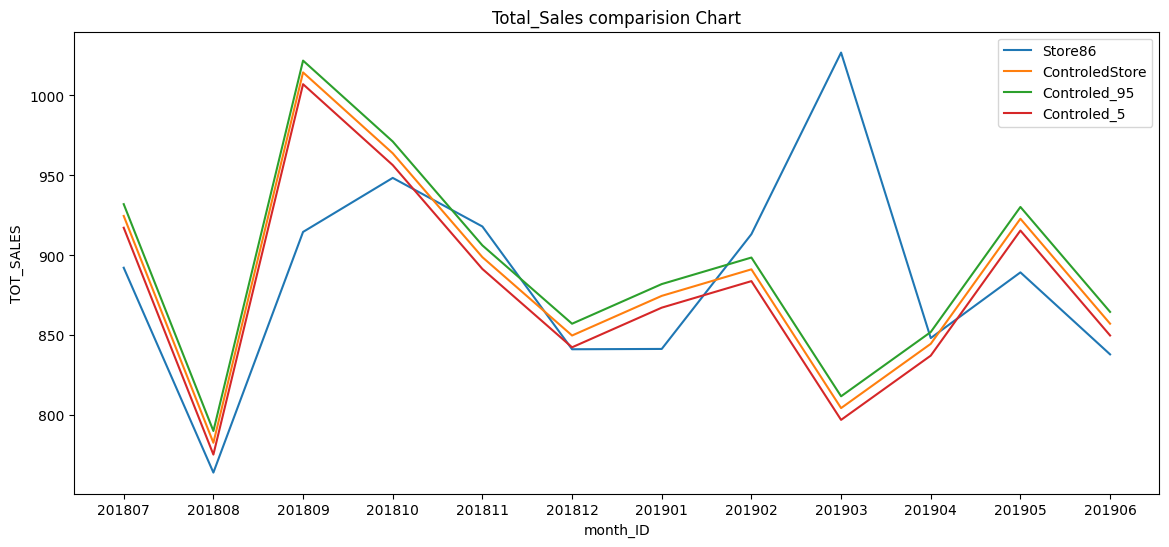

In [202]:
plt.figure(figsize=(14,6))
sns.lineplot(data=str2_comp_df, x='month_ID', y='TOT_SALES', label='Store86')
sns.lineplot(data=str2_comp_df, x='month_ID', y='TOT_SALES_C', label='ControledStore')
sns.lineplot(data=str2_comp_df, x='month_ID', y='p_95', label='Controled_95')
sns.lineplot(data=str2_comp_df, x='month_ID', y='p_5', label='Controled_5')
plt.title('Total_Sales comparision Chart')

Text(0.5, 1.0, 'Total_Sales comparision Chart')

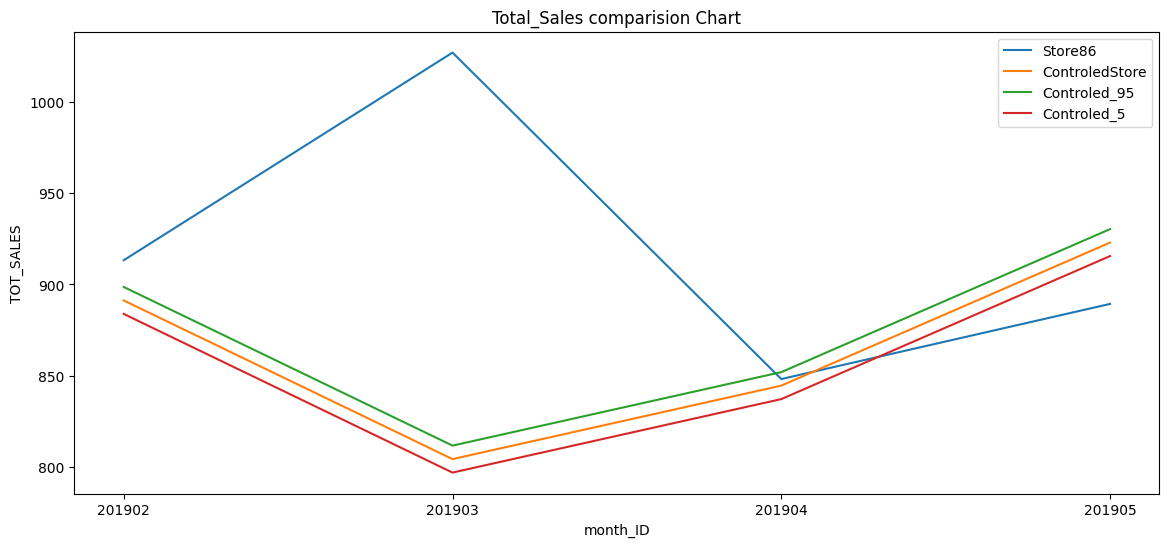

In [203]:
plt.figure(figsize=(14,6))
sns.lineplot(data=str2_comp_df.query('"201901"< month_ID < "201906"'), x='month_ID', y='TOT_SALES', label='Store86')
sns.lineplot(data=str2_comp_df.query('"201901"< month_ID < "201906"'), x='month_ID', y='TOT_SALES_C', label='ControledStore')
sns.lineplot(data=str2_comp_df.query('"201901"< month_ID < "201906"'), x='month_ID', y='p_95', label='Controled_95')
sns.lineplot(data=str2_comp_df.query('"201901"< month_ID < "201906"'), x='month_ID', y='p_5', label='Controled_5')
plt.title('Total_Sales comparision Chart')

In [204]:
str2_c_95 = str2_comp_df.query('"201901"< month_ID < "201905"')['TOT_SALES_C'].quantile(0.95)
str2_c_95

np.float64(886.5400000000001)

In [205]:
str2_c_5 = str2_comp_df.query('"201901"<= month_ID < "201905"')['TOT_SALES_C'].quantile(0.05)
str2_c_5

np.float64(810.43)

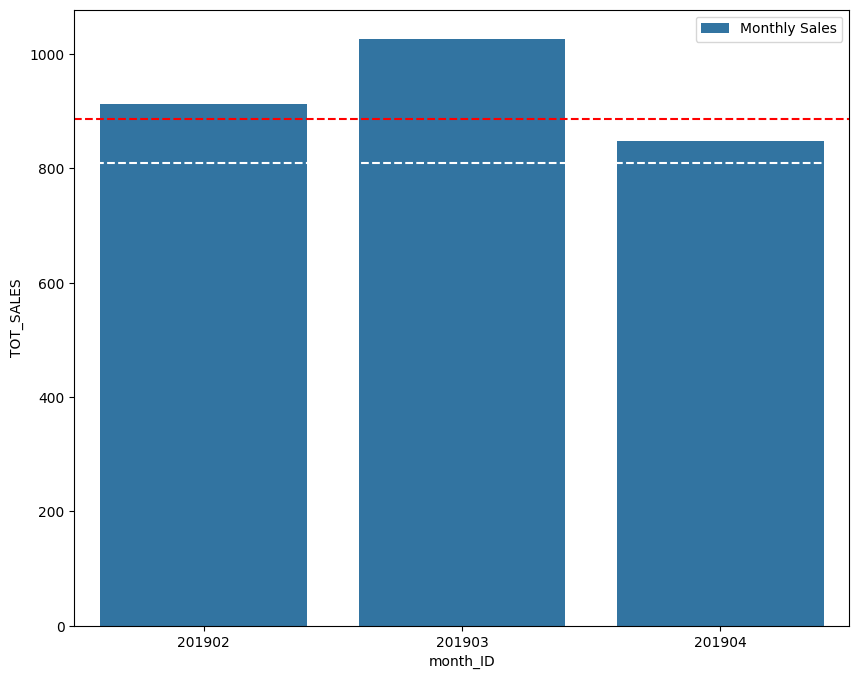

In [206]:
plt.figure(figsize=(10, 8))
sns.barplot(data=str2_comp_df.query('"201902"<= month_ID <"201905"'), x='month_ID', y='TOT_SALES', label='Monthly Sales')

plt.axhline(y=str2_c_95, color='red', linestyle='--', label='95th Percentile')
plt.axhline(y=str2_c_5, color='white', linestyle='--', label='95th Percentile')

# customer data analysis on Store 86

In [207]:
str2c_cmr_factor = df_po_st2['TOT_Customers'].sum()/df_po_st2_c['TOT_Customers'].sum()
str2c_cmr_factor

np.float64(1.0151515151515151)

In [208]:
str2_customer = df_agg.query('STORE_NBR == 86')[['month_ID','TOT_Customers']]
str2_customer

,month_ID,TOT_Customers
978,201807,99
979,201808,94
980,201809,103
981,201810,109
982,201811,100
983,201812,98
984,201901,94
985,201902,107
986,201903,115
987,201904,105


In [209]:
str2_c_customer = df_agg.query('STORE_NBR == 155')[['month_ID','TOT_Customers']]
str2_c_customer

,month_ID,TOT_Customers
1794,201807,101
1795,201808,91
1796,201809,103
1797,201810,108
1798,201811,101
1799,201812,97
1800,201901,96
1801,201902,95
1802,201903,94
1803,201904,99


In [210]:
str2_comp_df = str2_customer.merge(str2_c_customer, on='month_ID', how='inner').rename(columns={'TOT_Customers_x':'T_Customers','TOT_Customers_y':'T_Customers_C'})
str2_comp_df

,month_ID,T_Customers,T_Customers_C
0,201807,99,101
1,201808,94,91
2,201809,103,103
3,201810,109,108
4,201811,100,101
5,201812,98,97
6,201901,94,96
7,201902,107,95
8,201903,115,94
9,201904,105,99


As the factor is 1 we will treat the control total customer as the adjusted total customer.

In [211]:
str2_comp_df['%_diff'] = abs(((str2_comp_df['T_Customers'] - str2_comp_df['T_Customers_C']) / str2_comp_df['T_Customers_C'])*100)
str2_comp_df

,month_ID,T_Customers,T_Customers_C,%_diff
0,201807,99,101,1.980198
1,201808,94,91,3.296703
2,201809,103,103,0.000000
3,201810,109,108,0.925926
4,201811,100,101,0.990099
5,201812,98,97,1.030928
6,201901,94,96,2.083333
7,201902,107,95,12.631579
8,201903,115,94,22.340426
9,201904,105,99,6.060606


In [212]:
sd = str2_comp_df.query('month_ID < "201902"')['%_diff'].std()
sd

np.float64(1.0687444701395237)

In [213]:
str2_comp_df['t_values'] =  (str2_comp_df['%_diff'] - 0) / sd
str2_comp_df

,month_ID,T_Customers,T_Customers_C,%_diff,t_values
0,201807,99,101,1.980198,1.852826
1,201808,94,91,3.296703,3.084651
2,201809,103,103,0.000000,0.000000
3,201810,109,108,0.925926,0.866368
4,201811,100,101,0.990099,0.926413
5,201812,98,97,1.030928,0.964616
6,201901,94,96,2.083333,1.949328
7,201902,107,95,12.631579,11.819082
8,201903,115,94,22.340426,20.903430
9,201904,105,99,6.060606,5.670772


In [214]:
str2_comp_df.query(' month_ID > "201902"')

,month_ID,T_Customers,T_Customers_C,%_diff,t_values
8,201903,115,94,22.340426,20.903430
9,201904,105,99,6.060606,5.670772
10,201905,104,106,1.886792,1.765429
11,201906,98,95,3.157895,2.954771


In [215]:
str2_comp_df['p_95'] = str2_comp_df['T_Customers_C'] + pow(sd,2)
str2_comp_df['p_5'] = str2_comp_df['T_Customers_C'] - pow(sd,2)
str2_comp_df

,month_ID,T_Customers,T_Customers_C,%_diff,t_values,p_95,p_5
0,201807,99,101,1.980198,1.852826,102.142215,99.857785
1,201808,94,91,3.296703,3.084651,92.142215,89.857785
2,201809,103,103,0.000000,0.000000,104.142215,101.857785
3,201810,109,108,0.925926,0.866368,109.142215,106.857785
4,201811,100,101,0.990099,0.926413,102.142215,99.857785
5,201812,98,97,1.030928,0.964616,98.142215,95.857785
6,201901,94,96,2.083333,1.949328,97.142215,94.857785
7,201902,107,95,12.631579,11.819082,96.142215,93.857785
8,201903,115,94,22.340426,20.903430,95.142215,92.857785
9,201904,105,99,6.060606,5.670772,100.142215,97.857785


Text(0.5, 1.0, 'Total_Customer comparision Chart')

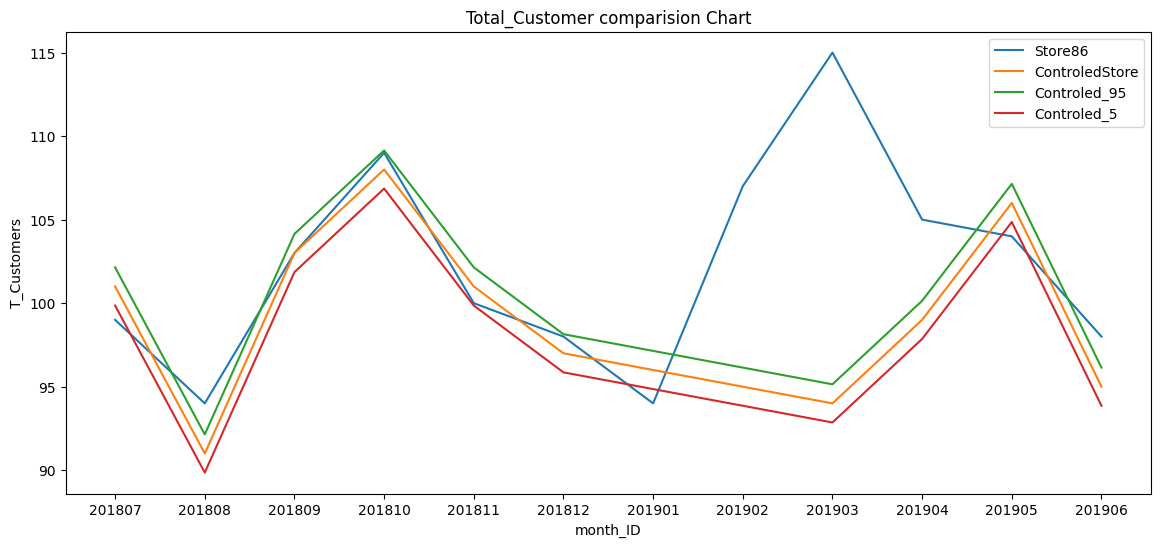

In [216]:
plt.figure(figsize=(14,6))
sns.lineplot(data=str2_comp_df, x='month_ID', y='T_Customers', label='Store86')
sns.lineplot(data=str2_comp_df, x='month_ID', y='T_Customers_C', label='ControledStore')
sns.lineplot(data=str2_comp_df, x='month_ID', y='p_95', label='Controled_95')
sns.lineplot(data=str2_comp_df, x='month_ID', y='p_5', label='Controled_5')
plt.title('Total_Customer comparision Chart')

Text(0.5, 1.0, 'Total_Customer comparision Chart')

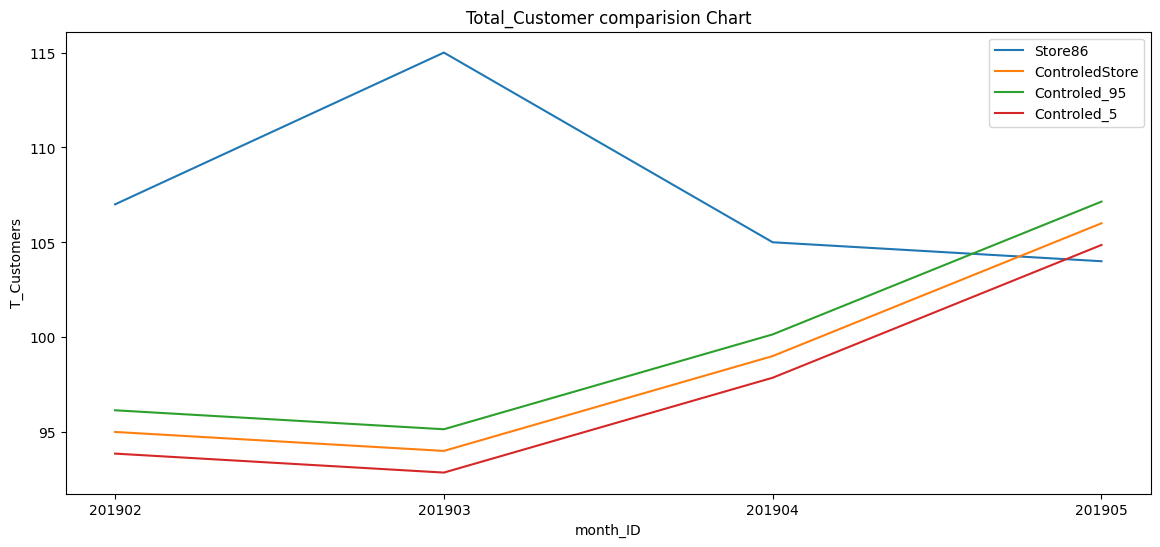

In [218]:
plt.figure(figsize=(14,6))
sns.lineplot(data=str2_comp_df.query('"201901"< month_ID < "201906"'), x='month_ID', y='T_Customers', label='Store86')
sns.lineplot(data=str2_comp_df.query('"201901"< month_ID < "201906"'), x='month_ID', y='T_Customers_C', label='ControledStore')
sns.lineplot(data=str2_comp_df.query('"201901"< month_ID < "201906"'), x='month_ID', y='p_95', label='Controled_95')
sns.lineplot(data=str2_comp_df.query('"201901"< month_ID < "201906"'), x='month_ID', y='p_5', label='Controled_5')
plt.title('Total_Customer comparision Chart')

In [217]:
#.query('"201901"< month_ID < "201906"')

SyntaxError: invalid syntax (3160169508.py, line 1)

In [123]:
str2_c_c95 = str2_comp_df.query('"201902"<= month_ID < "201905"')['T_Customers_C'].quantile(0.95)
str2_c_c95

np.float64(98.6)

In [124]:
str2_c_c5 = str2_comp_df.query('"201902"<= month_ID < "201905"')['T_Customers_C'].quantile(0.05)
str2_c_c5

np.float64(94.1)

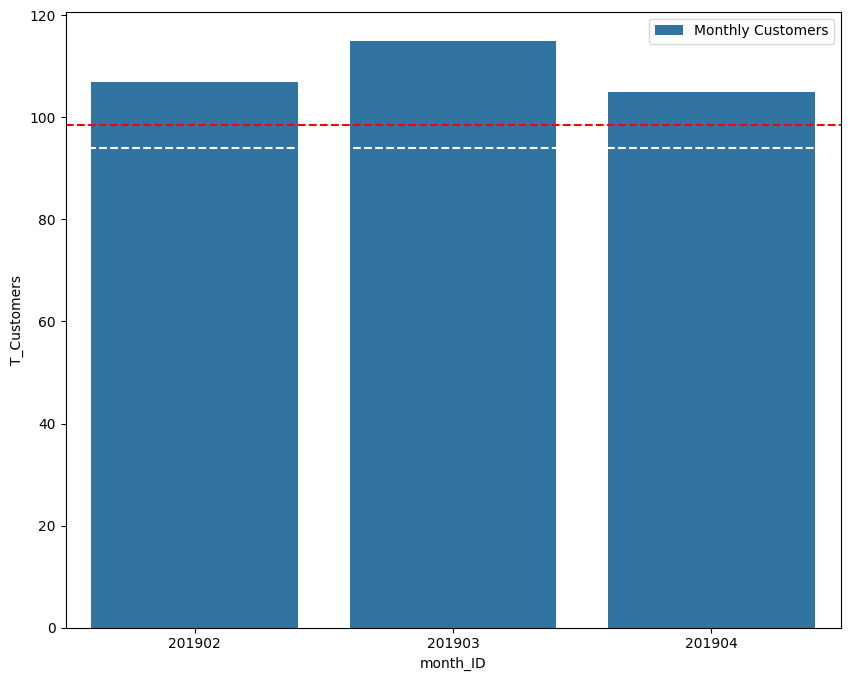

In [125]:
plt.figure(figsize=(10, 8))
sns.barplot(data=str2_comp_df.query('"201902"<= month_ID <"201905"'), x='month_ID', y='T_Customers', label='Monthly Customers')

plt.axhline(y=str2_c_c95, color='red', linestyle='--', label='95th Percentile')
plt.axhline(y=str2_c_c5, color='white', linestyle='--', label='95th Percentile')

#During the trial period we can see significant increase number of customers but the sales is almost similar to the control store.

# Analysis on trial Store 88

In [219]:
df_agg_po.query('STORE_NBR == [88]')

,STORE_NBR,month_ID,TOT_SALES,TOT_QTY,TOT_Customers,TOT_Transactions,TRN_P_Customer,Chips_per_customer,avgPrice_per_unit
1002,88,201807,1310.0,306,129,153,1.186047,2.372093,4.281046
1003,88,201808,1323.8,303,131,158,1.206107,2.312977,4.368977
1004,88,201809,1423.0,318,124,157,1.266129,2.564516,4.474843
1005,88,201810,1352.4,316,123,155,1.260163,2.569106,4.279747
1006,88,201811,1382.8,314,130,156,1.200000,2.415385,4.403822
1007,88,201812,1325.2,298,126,148,1.174603,2.365079,4.446980
1008,88,201901,1266.4,292,117,144,1.230769,2.495726,4.336986
1009,88,201902,1370.2,308,124,153,1.233871,2.483871,4.448701


In [220]:
df_agg_po_str3 = df_agg_po.query('STORE_NBR == 88')[['TOT_Customers', 'TOT_SALES']].reset_index(drop=True)

In [221]:
str3_sales_mean = df_agg_po_str3[['TOT_SALES']].mean()
str3_sales_mean

TOT_SALES    1344.225
dtype: float64

In [222]:
def tpl(n):
    np =df_agg_po.query('STORE_NBR == @n')[['TOT_SALES']].reset_index(drop=True)
    r = df_agg_po_str3['TOT_SALES'].corr(np['TOT_SALES'])
    return r

sales_list = []
for i in range(1,273):
        coe = tpl(i)  # Call the custom function
        sales_list.append(coe)

c:\Users\KNIGHT GOKU\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\KNIGHT GOKU\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\KNIGHT GOKU\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\KNIGHT GOKU\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\KNIGHT GOKU\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true

In [223]:
sales_list = pd.DataFrame(sales_list).rename(columns={0:'Sales_coe'})
sales_list

,Sales_coe
0,0.823306
1,-0.151853
2,-0.288716
3,-0.619880
4,0.038594
...,...
267,-0.100489
268,-0.165132
269,-0.737748
270,-0.166019


In [224]:
sales_list.query('Sales_coe >= 0.8')

,Sales_coe
0,0.823306
10,1.000000
30,1.000000
87,1.000000
158,0.895637
192,1.000000


Customer Data Analysis

In [225]:
def tpl(n):
    np = df_agg_po.query('STORE_NBR == @n')[['TOT_Customers']].reset_index(drop=True)
    r = df_agg_po_str3['TOT_Customers'].corr(np['TOT_Customers'])
    return r

customer_list = []
for i in range(1,273):
        cmr_coe = tpl(i)  # Call the custom function
        customer_list.append(cmr_coe)

c:\Users\KNIGHT GOKU\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\KNIGHT GOKU\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\KNIGHT GOKU\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\KNIGHT GOKU\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\KNIGHT GOKU\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\KNIGHT GOKU\Ap

In [226]:
customer_list = pd.DataFrame(customer_list).rename(columns={0:'Customer_coe'})

In [227]:
customer_list.query('Customer_coe >= 0.9')

,Customer_coe
13,0.928985
34,0.901397
87,1.000000
236,0.942232


In [228]:
sales_list.query('Sales_coe >= 0.8')

,Sales_coe
0,0.823306
10,1.000000
30,1.000000
87,1.000000
158,0.895637
192,1.000000


#Here we will use the meanvalue technique for sales data of store 88

In [229]:
def tpl(n):
    np = df_agg_po.query('STORE_NBR == @n')[['TOT_SALES']].mean()
    return np

sales_list = []
for i in range(1,273):
    str_mean = tpl(i)
    sales_list.append(str_mean)


In [230]:
sales_list = pd.DataFrame(sales_list).rename(columns={'TOT_SALES':'Sales_mean'})
sales_list

,Sales_mean
0,201.53750
1,158.48750
2,1090.48125
3,1251.30000
4,808.33750
...,...
267,214.25625
268,952.46250
269,945.79375
270,813.91250


In [231]:
sales_diff = []
for i in sales_list['Sales_mean']:
    mean_d = i - str3_sales_mean
    sales_diff.append(mean_d)

sales_diff = pd.DataFrame(sales_diff).rename(columns={'TOT_SALES':'Mean_diff'})

In [232]:
sales_diff

,Mean_diff
0,-1142.68750
1,-1185.73750
2,-253.74375
3,-92.92500
4,-535.88750
...,...
267,-1129.96875
268,-391.76250
269,-398.43125
270,-530.31250


In [233]:
sales_diff.query('-10<=Mean_diff<10')

,Mean_diff
87,0.0
236,2.5


In [234]:
customer_list.query('Customer_coe >= 0.9')

,Customer_coe
13,0.928985
34,0.901397
87,1.000000
236,0.942232


#Index 236 (Store 237) is the only common indexes and has strogest positive relation with Store 88's total customer and total sales data thus we will select #Store237 as the control store for trial store 88

In [235]:
df_agg_po.query('STORE_NBR == 88')[['month_ID','TOT_Customers', 'TOT_SALES']]

,month_ID,TOT_Customers,TOT_SALES
1002,201807,129,1310.0
1003,201808,131,1323.8
1004,201809,124,1423.0
1005,201810,123,1352.4
1006,201811,130,1382.8
1007,201812,126,1325.2
1008,201901,117,1266.4
1009,201902,124,1370.2


In [236]:
df_po_st3 = df_agg_po.query('STORE_NBR == 88')[['month_ID','TOT_Customers', 'TOT_SALES']]

In [237]:
df_agg_po.query('STORE_NBR == 237')[['month_ID','TOT_Customers', 'TOT_SALES']]

,month_ID,TOT_Customers,TOT_SALES
2748,201807,128,1448.4
2749,201808,135,1367.8
2750,201809,126,1322.2
2751,201810,123,1348.3
2752,201811,132,1397.6
2753,201812,124,1265.0
2754,201901,117,1219.7
2755,201902,126,1404.8


In [238]:
df_po_st3_c = df_agg_po.query('STORE_NBR == 237')[['month_ID','TOT_Customers', 'TOT_SALES']]

#We are selecting Store 237 to be the control store for the trial store 88

Text(0.5, 1.0, 'Total_Customers Chart')

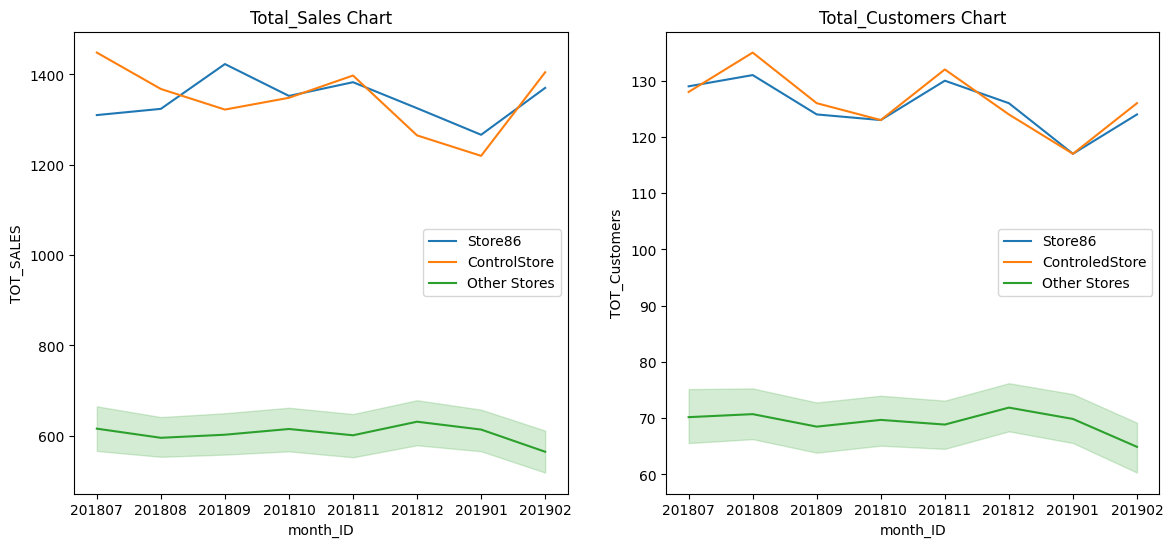

In [239]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.lineplot(data=df_po_st3, x='month_ID', y='TOT_SALES', label='Store86')
sns.lineplot(data=df_po_st3_c, x='month_ID', y='TOT_SALES', label='ControlStore')
sns.lineplot(data=df_agg_po.query('STORE_NBR != [88,237]'), x='month_ID', y='TOT_SALES', label='Other Stores')
plt.title('Total_Sales Chart')
plt.subplot(1,2,2)
sns.lineplot(data=df_po_st3, x='month_ID', y='TOT_Customers', label='Store86')
sns.lineplot(data=df_po_st3_c, x='month_ID', y='TOT_Customers', label='ControledStore')
sns.lineplot(data=df_agg_po.query('STORE_NBR != [88,237]'), x='month_ID', y='TOT_Customers', label='Other Stores')
plt.title('Total_Customers Chart')

# Store88 statistical analysis

In [240]:
str3c_factor = df_po_st3['TOT_SALES'].sum()/df_po_st3_c['TOT_SALES'].sum()
str3c_factor

np.float64(0.998143644767863)

In [241]:
str3_sales = df_agg.query('STORE_NBR == 88')[['month_ID','TOT_SALES']]
str3_sales

,month_ID,TOT_SALES
1002,201807,1310.00
1003,201808,1323.80
1004,201809,1423.00
1005,201810,1352.40
1006,201811,1382.80
1007,201812,1325.20
1008,201901,1266.40
1009,201902,1370.20
1010,201903,1477.20
1011,201904,1439.40


In [242]:
str3_c_sales = df_agg.query('STORE_NBR == 237')[['month_ID','TOT_SALES']]
str3_c_sales

,month_ID,TOT_SALES
2748,201807,1448.4
2749,201808,1367.8
2750,201809,1322.2
2751,201810,1348.3
2752,201811,1397.6
2753,201812,1265.0
2754,201901,1219.7
2755,201902,1404.8
2756,201903,1208.2
2757,201904,1204.6


In [243]:
str3_sales.merge(str3_c_sales, on='month_ID', how='inner').rename(columns={'TOT_SALES_x':'TOT_SALES', 'TOT_SALES_y':'TOT_SALES_C'})

,month_ID,TOT_SALES,TOT_SALES_C
0,201807,1310.00,1448.4
1,201808,1323.80,1367.8
2,201809,1423.00,1322.2
3,201810,1352.40,1348.3
4,201811,1382.80,1397.6
5,201812,1325.20,1265.0
6,201901,1266.40,1219.7
7,201902,1370.20,1404.8
8,201903,1477.20,1208.2
9,201904,1439.40,1204.6


In [244]:
str3_c_ScaledSales = str3_c_sales['TOT_SALES'] * str3c_factor
str3_c_ScaledSales

2748    1445.711255
2749    1365.260877
2750    1319.745527
2751    1345.797076
2752    1395.005558
2753    1262.651711
2754    1217.435804
2755    1402.192192
2756    1205.957152
2757    1202.363834
2758    1197.073673
2759    1151.458509
Name: TOT_SALES, dtype: float64

In [245]:
str3_c_sales['Scaled_Sales'] = str3_c_ScaledSales

In [246]:
str3_sales = str3_sales.merge(str3_c_sales, on='month_ID', how='inner').rename(columns={'TOT_SALES_x':'TOT_SALES', 'TOT_SALES_y':'TOT_SALES_C'})
str3_sales

,month_ID,TOT_SALES,TOT_SALES_C,Scaled_Sales
0,201807,1310.00,1448.4,1445.711255
1,201808,1323.80,1367.8,1365.260877
2,201809,1423.00,1322.2,1319.745527
3,201810,1352.40,1348.3,1345.797076
4,201811,1382.80,1397.6,1395.005558
5,201812,1325.20,1265.0,1262.651711
6,201901,1266.40,1219.7,1217.435804
7,201902,1370.20,1404.8,1402.192192
8,201903,1477.20,1208.2,1205.957152
9,201904,1439.40,1204.6,1202.363834


In [247]:
str3_sales['%_diff'] = abs(((str3_sales['TOT_SALES'] - str3_sales['Scaled_Sales'] ) / str3_sales['Scaled_Sales']) * 100)
str3_sales

,month_ID,TOT_SALES,TOT_SALES_C,Scaled_Sales,%_diff
0,201807,1310.00,1448.4,1445.711255,9.387162
1,201808,1323.80,1367.8,1365.260877,3.036847
2,201809,1423.00,1322.2,1319.745527,7.823817
3,201810,1352.40,1348.3,1345.797076,0.490633
4,201811,1382.80,1397.6,1395.005558,0.874947
5,201812,1325.20,1265.0,1262.651711,4.953725
6,201901,1266.40,1219.7,1217.435804,4.021912
7,201902,1370.20,1404.8,1402.192192,2.281584
8,201903,1477.20,1208.2,1205.957152,22.491914
9,201904,1439.40,1204.6,1202.363834,19.714180


In [248]:
sd = str3_sales.query('month_ID < "201902"')['%_diff'].std()
sd

np.float64(3.3317874687050675)

In [249]:
str3_sales['t_values'] =  (str3_sales['%_diff'] - 0) / sd
str3_sales

,month_ID,TOT_SALES,TOT_SALES_C,Scaled_Sales,%_diff,t_values
0,201807,1310.00,1448.4,1445.711255,9.387162,2.817455
1,201808,1323.80,1367.8,1365.260877,3.036847,0.911477
2,201809,1423.00,1322.2,1319.745527,7.823817,2.348234
3,201810,1352.40,1348.3,1345.797076,0.490633,0.147258
4,201811,1382.80,1397.6,1395.005558,0.874947,0.262606
5,201812,1325.20,1265.0,1262.651711,4.953725,1.486807
6,201901,1266.40,1219.7,1217.435804,4.021912,1.207133
7,201902,1370.20,1404.8,1402.192192,2.281584,0.684793
8,201903,1477.20,1208.2,1205.957152,22.491914,6.750705
9,201904,1439.40,1204.6,1202.363834,19.714180,5.916998


In [250]:
str3_sales.query(' month_ID > "201902"')

,month_ID,TOT_SALES,TOT_SALES_C,Scaled_Sales,%_diff,t_values
8,201903,1477.20,1208.2,1205.957152,22.491914,6.750705
9,201904,1439.40,1204.6,1202.363834,19.714180,5.916998
10,201905,1308.25,1199.3,1197.073673,9.287342,2.787495
11,201906,1354.60,1153.6,1151.458509,17.642103,5.295086


In [251]:
str3_sales['p_95'] = str3_sales['TOT_SALES_C'] + pow(sd,2)
str3_sales['p_5'] = str3_sales['TOT_SALES_C'] - pow(sd,2)
str3_sales

,month_ID,TOT_SALES,TOT_SALES_C,Scaled_Sales,%_diff,t_values,p_95,p_5
0,201807,1310.00,1448.4,1445.711255,9.387162,2.817455,1459.500808,1437.299192
1,201808,1323.80,1367.8,1365.260877,3.036847,0.911477,1378.900808,1356.699192
2,201809,1423.00,1322.2,1319.745527,7.823817,2.348234,1333.300808,1311.099192
3,201810,1352.40,1348.3,1345.797076,0.490633,0.147258,1359.400808,1337.199192
4,201811,1382.80,1397.6,1395.005558,0.874947,0.262606,1408.700808,1386.499192
5,201812,1325.20,1265.0,1262.651711,4.953725,1.486807,1276.100808,1253.899192
6,201901,1266.40,1219.7,1217.435804,4.021912,1.207133,1230.800808,1208.599192
7,201902,1370.20,1404.8,1402.192192,2.281584,0.684793,1415.900808,1393.699192
8,201903,1477.20,1208.2,1205.957152,22.491914,6.750705,1219.300808,1197.099192
9,201904,1439.40,1204.6,1202.363834,19.714180,5.916998,1215.700808,1193.499192


Text(0.5, 1.0, 'Total_Sales comparision Chart')

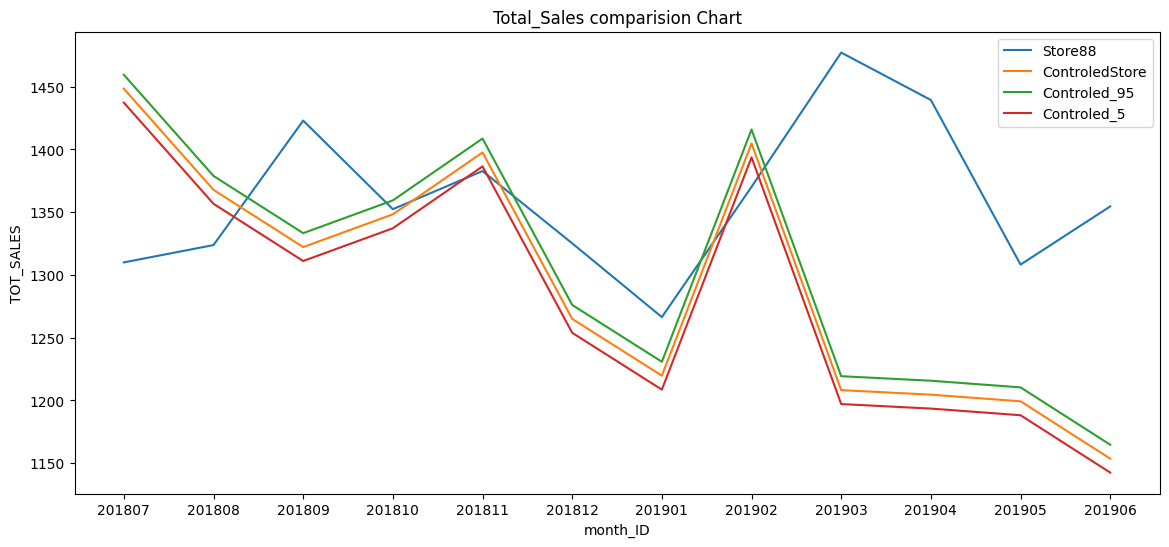

In [252]:
plt.figure(figsize=(14,6))
sns.lineplot(data=str3_sales, x='month_ID', y='TOT_SALES', label='Store88')
sns.lineplot(data=str3_sales, x='month_ID', y='TOT_SALES_C', label='ControledStore')
sns.lineplot(data=str3_sales, x='month_ID', y='p_95', label='Controled_95')
sns.lineplot(data=str3_sales, x='month_ID', y='p_5', label='Controled_5')
plt.title('Total_Sales comparision Chart')

Text(0.5, 1.0, 'Total_Sales comparision Chart')

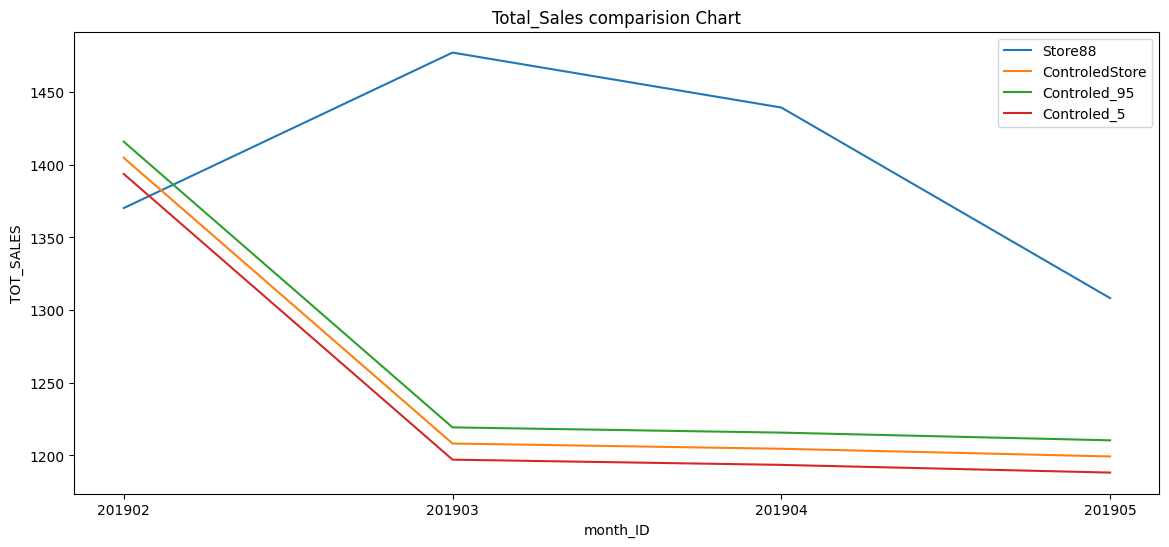

In [271]:
plt.figure(figsize=(14,6))
sns.lineplot(data=str3_sales.query('"201902"<= month_ID < "201906"'), x='month_ID', y='TOT_SALES', label='Store88')
sns.lineplot(data=str3_sales.query('"201902"<= month_ID < "201906"'), x='month_ID', y='TOT_SALES_C', label='ControledStore')
sns.lineplot(data=str3_sales.query('"201902"<= month_ID < "201906"'), x='month_ID', y='p_95', label='Controled_95')
sns.lineplot(data=str3_sales.query('"201902"<= month_ID < "201906"'), x='month_ID', y='p_5', label='Controled_5')
plt.title('Total_Sales comparision Chart')

In [254]:
str3_c_95 = str3_sales.query('"201902"<= month_ID < "201905"')['TOT_SALES_C'].quantile(0.95)
str3_c_95

np.float64(1385.1399999999999)

In [255]:
str3_c_5 = str3_sales.query('"201902"<= month_ID < "201905"')['TOT_SALES_C'].quantile(0.05)
str3_c_5

np.float64(1204.96)

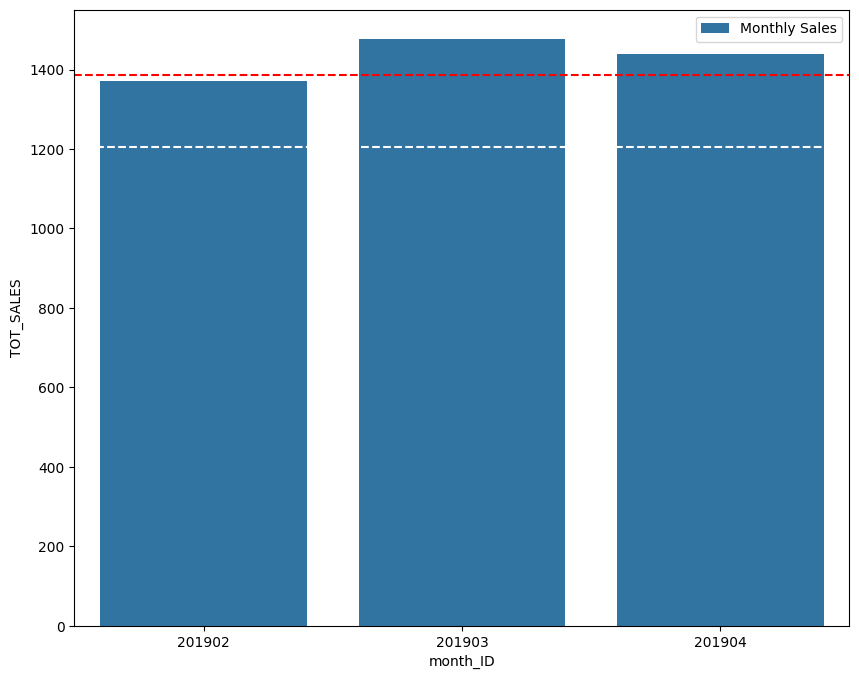

In [256]:
plt.figure(figsize=(10, 8))
sns.barplot(data=str3_sales.query('"201902"<= month_ID <"201905"'), x='month_ID', y='TOT_SALES', label='Monthly Sales')

plt.axhline(y=str3_c_95, color='red', linestyle='--', label='95th Percentile')
plt.axhline(y=str3_c_5, color='white', linestyle='--', label='95th Percentile')

# Customer data analysis for Store 88

In [257]:
str3c_cmr_factor = df_po_st3['TOT_Customers'].sum()/df_po_st3_c['TOT_Customers'].sum()
str3c_cmr_factor

np.float64(0.9930761622156281)

In [258]:
str3_customer = df_agg.query('STORE_NBR == 88')[['month_ID','TOT_Customers']]
str3_customer

,month_ID,TOT_Customers
1002,201807,129
1003,201808,131
1004,201809,124
1005,201810,123
1006,201811,130
1007,201812,126
1008,201901,117
1009,201902,124
1010,201903,134
1011,201904,128


In [259]:
str3_c_customer = df_agg.query('STORE_NBR == 237')[['month_ID','TOT_Customers']]
str3_c_customer

,month_ID,TOT_Customers
2748,201807,128
2749,201808,135
2750,201809,126
2751,201810,123
2752,201811,132
2753,201812,124
2754,201901,117
2755,201902,126
2756,201903,119
2757,201904,120


In [260]:
str3_customer = str3_customer.merge(str3_c_customer, on='month_ID', how='inner').rename(columns={'TOT_Customers_x':'T_Customers','TOT_Customers_y':'T_Customers_C'})
str3_customer

,month_ID,T_Customers,T_Customers_C
0,201807,129,128
1,201808,131,135
2,201809,124,126
3,201810,123,123
4,201811,130,132
5,201812,126,124
6,201901,117,117
7,201902,124,126
8,201903,134,119
9,201904,128,120


In [261]:
str3_customer['Scaled_Customers'] = str3_customer['T_Customers_C'] * str3c_factor
str3_customer

,month_ID,T_Customers,T_Customers_C,Scaled_Customers
0,201807,129,128,127.762387
1,201808,131,135,134.749392
2,201809,124,126,125.766099
3,201810,123,123,122.771668
4,201811,130,132,131.754961
5,201812,126,124,123.769812
6,201901,117,117,116.782806
7,201902,124,126,125.766099
8,201903,134,119,118.779094
9,201904,128,120,119.777237


In [262]:
str3_customer['%_diff'] = abs(((str3_customer['T_Customers'] - str3_customer['Scaled_Customers']) / str3_customer['Scaled_Customers'])*100)
str3_customer

,month_ID,T_Customers,T_Customers_C,Scaled_Customers,%_diff
0,201807,129,128,127.762387,0.968684
1,201808,131,135,134.749392,2.782493
2,201809,124,126,125.766099,1.404273
3,201810,123,123,122.771668,0.185981
4,201811,130,132,131.754961,1.331989
5,201812,126,124,123.769812,1.801884
6,201901,117,117,116.782806,0.185981
7,201902,124,126,125.766099,1.404273
8,201903,134,119,118.779094,12.814466
9,201904,128,120,119.777237,6.865046


In [263]:
sd = str3_customer.query('month_ID < "201902"')['%_diff'].std()
sd

np.float64(0.9152340453291177)

In [264]:
str3_customer['t_values'] =  (str3_customer['%_diff'] - 0) / sd
str3_customer

,month_ID,T_Customers,T_Customers_C,Scaled_Customers,%_diff,t_values
0,201807,129,128,127.762387,0.968684,1.058400
1,201808,131,135,134.749392,2.782493,3.040198
2,201809,124,126,125.766099,1.404273,1.534332
3,201810,123,123,122.771668,0.185981,0.203206
4,201811,130,132,131.754961,1.331989,1.455353
5,201812,126,124,123.769812,1.801884,1.968768
6,201901,117,117,116.782806,0.185981,0.203206
7,201902,124,126,125.766099,1.404273,1.534332
8,201903,134,119,118.779094,12.814466,14.001299
9,201904,128,120,119.777237,6.865046,7.500864


In [265]:
str3_customer.query(' month_ID > "201902"')

,month_ID,T_Customers,T_Customers_C,Scaled_Customers,%_diff,t_values
8,201903,134,119,118.779094,12.814466,14.001299
9,201904,128,120,119.777237,6.865046,7.500864
10,201905,128,129,128.760530,0.590655,0.645359
11,201906,121,119,118.779094,1.869779,2.042951


In [266]:
str3_customer['p_95'] = str3_customer['T_Customers_C'] + pow(sd,2)
str3_customer['p_5'] = str3_customer['T_Customers_C'] - pow(sd,2)
str3_customer

,month_ID,T_Customers,T_Customers_C,Scaled_Customers,%_diff,t_values,p_95,p_5
0,201807,129,128,127.762387,0.968684,1.058400,128.837653,127.162347
1,201808,131,135,134.749392,2.782493,3.040198,135.837653,134.162347
2,201809,124,126,125.766099,1.404273,1.534332,126.837653,125.162347
3,201810,123,123,122.771668,0.185981,0.203206,123.837653,122.162347
4,201811,130,132,131.754961,1.331989,1.455353,132.837653,131.162347
5,201812,126,124,123.769812,1.801884,1.968768,124.837653,123.162347
6,201901,117,117,116.782806,0.185981,0.203206,117.837653,116.162347
7,201902,124,126,125.766099,1.404273,1.534332,126.837653,125.162347
8,201903,134,119,118.779094,12.814466,14.001299,119.837653,118.162347
9,201904,128,120,119.777237,6.865046,7.500864,120.837653,119.162347


Text(0.5, 1.0, 'Total_Customer comparision Chart')

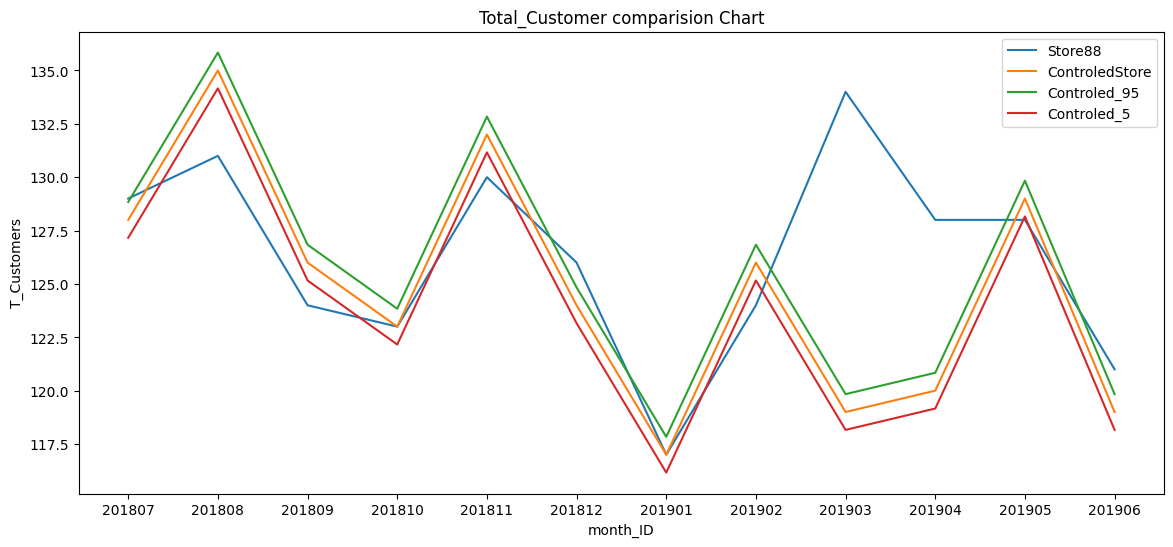

In [267]:
plt.figure(figsize=(14,6))
sns.lineplot(data=str3_customer, x='month_ID', y='T_Customers', label='Store88')
sns.lineplot(data=str3_customer, x='month_ID', y='T_Customers_C', label='ControledStore')
sns.lineplot(data=str3_customer, x='month_ID', y='p_95', label='Controled_95')
sns.lineplot(data=str3_customer, x='month_ID', y='p_5', label='Controled_5')
plt.title('Total_Customer comparision Chart')

Text(0.5, 1.0, 'Total_Customer comparision Chart')

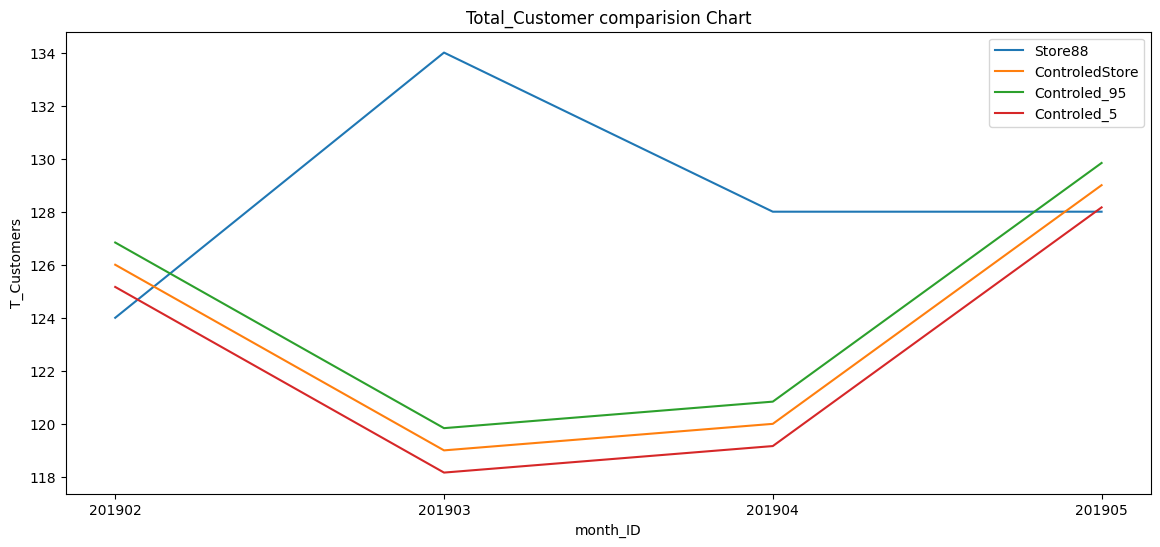

In [272]:
plt.figure(figsize=(14,6))
sns.lineplot(data=str3_customer.query('"201902"<= month_ID < "201906"'), x='month_ID', y='T_Customers', label='Store88')
sns.lineplot(data=str3_customer.query('"201902"<= month_ID < "201906"'), x='month_ID', y='T_Customers_C', label='ControledStore')
sns.lineplot(data=str3_customer.query('"201902"<= month_ID < "201906"'), x='month_ID', y='p_95', label='Controled_95')
sns.lineplot(data=str3_customer.query('"201902"<= month_ID < "201906"'), x='month_ID', y='p_5', label='Controled_5')
plt.title('Total_Customer comparision Chart')

In [268]:
str3_c_c95 = str3_customer.query('"201902"<= month_ID < "201905"')['T_Customers_C'].quantile(0.95)
str3_c_c95

np.float64(125.4)

In [269]:
str3_c_c5 = str3_customer.query('"201902"<= month_ID < "201905"')['T_Customers_C'].quantile(0.05)
str3_c_c5

np.float64(119.1)

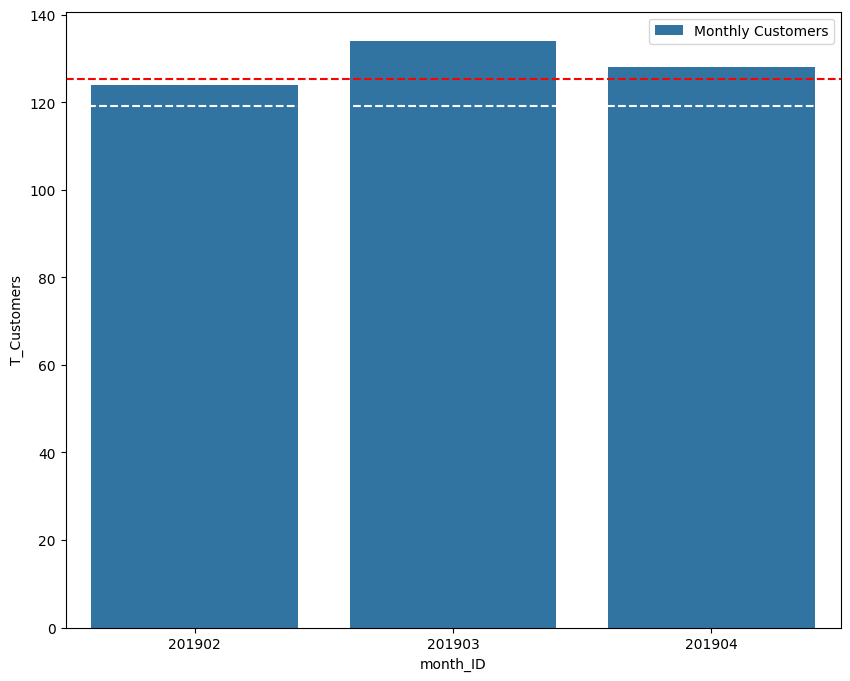

In [270]:
plt.figure(figsize=(10, 8))
sns.barplot(data=str3_customer.query('"201902"<= month_ID <"201905"'), x='month_ID', y='T_Customers', label='Monthly Customers')

plt.axhline(y=str3_c_c95, color='red', linestyle='--', label='95th Percentile')
plt.axhline(y=str3_c_c5, color='white', linestyle='--', label='95th Percentile')

#During the trial period we can see significant increase number of customers and same for the total sales of the store compare to the control store.

The trial was a successfull one for Store 88

## Conclusion
We've found control stores 233, 155, 237 for trial stores 77, 86 and 88
respectively.
The results for trial stores 77 and 88 during the trial period show a significant
difference in at least two of the three trial months but this is not the case for
trial store 86. We can check with the client if the implementation of the trial was
different in trial store 86 but overall, the trial shows a significant increase in
sales. Now that we have finished our analysis, we can prepare our presentation to
the Category Manager.